# Cost Function - Polygons

First let's draw polygons on image

In [2]:
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import numpy as np
import PIL.ImageDraw as ImageDraw
import PIL.Image as Image

In [117]:
# Calculates difference between two images. It done subtracting one image from another.
# img1 and img2 are images in numpy array format.
def abs_error(img1, img2):
    return np.sum(np.abs(img1.astype("int32") - img2.astype("int32")))

def square_error(img1, img2):
    return np.sum(np.square(img1.astype("int64") - img2.astype("int64")))

In [48]:
np.sum(np.square(orig_mat[:3,:3].astype("int32") - orig_mat[3:6,3:6].astype("int32")))

6085

In [37]:
# Generates image from polygons
    #size - image height and width
    #polygons - list of polygons, in shape [[R,G,B,A,X0,Y0, ..., Xn, Yn], 

def gen_image_poly(size, polygons):

    image = Image.new("RGB", size, (255,255,255,0))
        
    draw = ImageDraw.Draw(image, mode="RGBA")

    nr_vertex = (len(polygons[0]) - 4)//2 # TODO make it better

    for pol in polygons:
        fill = np.concatenate([pol[:3], [pol[3]]]) # Scale fill between 0 to 100.
        fill = tuple(map(int, fill))  # Make R,G,B to ints and leave alpha as it is
        points = np.reshape(pol[4:], newshape=(nr_vertex,2))  # TODO number of vertices must be known?
        points = tuple(map(tuple, points))
        draw.polygon(points, fill= fill)
    
    img_mat = np.array(image)

    del image
    del draw

    return img_mat
#image
#np.asarray(image).shape

In [298]:
# Cost function for using polygons
    # orig_mat - original image given as matrix
    # nr_poly - number of polygons used
    # params - information about polygons in 1-D array (R,G,B,A,x0,y0,...,xn,yn)

def cost_poly(params, orig_mat, nr_poly):
    
    polygons = np.split(params, nr_poly)
    size = tuple(reversed(orig_mat.shape[:2])) # W and H of image
    
    new_mat = gen_image_poly(size = size, polygons = polygons)
        
    return square_error(orig_mat, new_mat)

## Test cost function

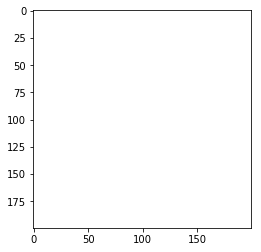

In [8]:
polygons_txt = "2 0 5 0.9886052134148646 98 151 161 200 199 1 52 0 116 117 24 189 3 5 9 0.9994804367888221 57 145 5 0 198 1 147 11 200 188 199 198 255 254 252 0.9915305913286963 187 171 132 6 16 40 109 45 93 2 18 57 254 254 254 0.9988951206026371 172 199 199 172 137 19 200 31 17 40 139 15 69 24 56 0.12523059242208978 192 12 108 32 196 76 101 134 82 40 175 110 33 15 49 0.8511456315478534 158 199 172 67 7 86 197 17 181 167 122 195 2 10 10 0.9948295021512059 24 176 9 125 43 27 183 163 101 45 49 52 66 80 80 0.4493670272179049 25 200 185 128 182 124 33 9 49 25 74 128 22 12 26 0.3400040422356272 91 195 83 20 6 97 186 70 29 146 56 5 0 0 0 0.001 55 195 194 80 111 68 128 49 134 12 56 106 253 253 253 0.9057830752878273 165 54 2 97 67 20 48 89 162 22 155 104 10 8 13 0.9359471533611046 121 1 198 0 160 79 150 52 36 145 188 60 33 31 34 0.874288723450827 141 33 172 145 199 11 200 199 188 200 44 135 4 3 8 0.7577250731780771 197 193 44 146 35 197 177 139 148 198 23 58 9 9 9 0.9523490773409384 73 144 15 95 0 1 0 200 200 200 160 168 199 189 201 0.23982702450414806 184 17 200 172 62 69 119 199 115 35 175 111 60 63 54 0.2886550304159803 183 197 200 2 6 0 153 146 166 137 154 179 1 1 1 0.8386418505500401 74 41 27 90 199 144 200 17 132 148 153 82 4 2 3 0.4738645882993977 4 68 196 145 156 37 174 162 83 187 49 66 67 61 63 0.2645318406110364 188 144 145 29 108 39 24 44 124 76 154 63 123 130 124 0.2185319329772073 69 13 167 172 131 176 148 30 10 110 49 199 242 242 240 0.9899702077880892 167 92 100 197 96 4 124 5 39 172 23 130 9 4 8 0.9201817598711366 154 103 200 0 200 129 116 153 130 149 118 169 27 20 25 0.40342505854185506 39 190 1 138 66 89 103 29 157 133 185 61 233 236 230 0.298637912970688 31 95 158 131 28 160 166 140 115 2 97 65 8 1 5 0.239427367542574 55 28 183 106 46 121 143 58 197 80 138 38 10 6 9 0.9038660536497067 192 14 147 17 200 146 116 171 187 161 191 129 1 3 1 0.8285458216013213 97 185 67 97 62 58 119 75 56 88 141 89 36 36 36 0.520175048784786 151 107 124 56 200 199 43 200 46 187 197 167 32 31 33 0.9956105846866175 140 200 117 186 53 131 41 47 2 11 65 200 19 19 19 0.9981913327632532 3 176 66 5 0 0 4 198 150 60 84 149 16 17 16 0.9744062308876296 131 89 189 119 158 102 89 78 11 169 2 97 178 230 191 0.06663820046394742 74 200 66 14 103 0 200 18 199 174 118 139 248 240 248 0.3065733746415329 180 84 134 5 66 22 28 180 144 127 163 54 2 0 2 0.4098868623072611 119 145 149 89 116 134 97 199 54 107 18 70 18 17 17 0.5099138397841425 11 183 12 164 199 197 200 0 200 182 167 196 255 254 253 0.15156859121384736 97 1 103 172 192 161 121 66 167 69 39 68 0 0 0 0.001 101 21 127 30 141 26 126 91 98 7 37 129 234 228 232 0.22785085392551485 131 175 36 195 64 18 118 0 136 90 147 30 220 220 220 0.3357030932024738 63 154 76 60 94 136 172 133 34 32 126 78 20 18 20 0.44227026980717765 2 7 92 132 81 69 56 64 45 118 24 174 23 29 25 0.2350174616893832 93 140 181 167 142 176 44 34 83 0 13 89 203 207 201 0.24011583166836892 126 151 140 149 34 183 49 104 129 97 72 102 0 0 0 0.001 85 109 10 194 56 121 40 126 11 156 111 53 15 14 14 0.38262537272354913 85 63 108 144 88 168 101 116 26 17 8 106 20 26 21 0.12105250835394599 118 199 83 123 96 199 153 116 36 70 174 34 0 17 2 0.048843922033566356 118 1 109 75 85 179 31 96 96 96 43 64 228 226 228 0.35800327879825367 97 167 112 165 126 115 131 40 39 159 131 134 66 67 67 0.2697182498643409 123 37 47 153 39 173 43 152 114 86 92 64 0 0 0 0.001 102 181 195 192 99 43 81 134 6 82 199 197"

polygons = polygons_txt.split()
polygons_array = np.array(list(map(float, polygons)))
nr_pols = 50

polygons = np.split(polygons_array, nr_pols)

new_img = gen_image_poly((200,200), polygons)

plt.imshow(new_img, interpolation='nearest')
plt.show()

# ATM does not work, cause alpha in range of (0,1) should be (0,100)

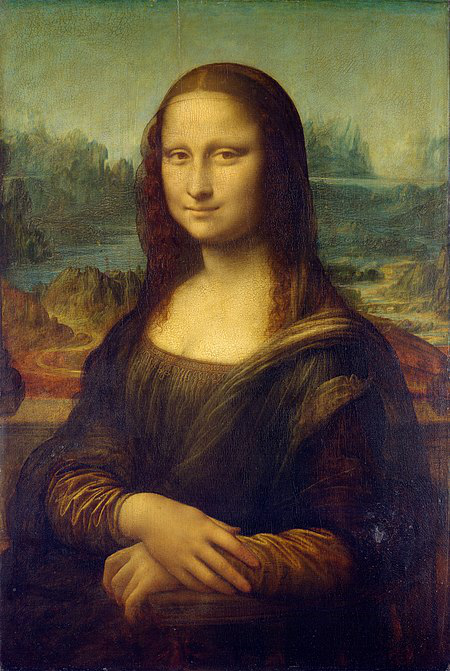

In [9]:
mona_lisa = Image.open("mona_lisa.jpg")
mona_lisa

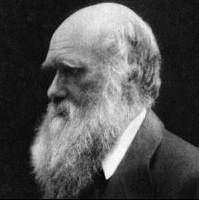

In [10]:
darwin = Image.open("darwin.png").convert("RGB")
darwin

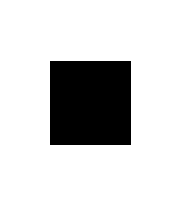

In [159]:
square = Image.open("square.png").convert("RGB")
square

In [71]:
orig_mat = np.array(mona_lisa)
print(orig_mat.shape)
cost_poly(polygons_array, orig_mat, 50)

(671, 450, 3)


166823353

In [70]:
orig_mat = np.array(darwin)
cost_poly(polygons_array, orig_mat, 50)

20676969

In [73]:
20676969/(200*199*3*255)

0.6791135087200709

In [162]:
orig_square = np.array(square)
print(orig_square.shape)

(208, 187, 3)


## Try differential evolution

In [89]:
from scipy.optimize import differential_evolution

Function to get easily the bounds of parameters.

In [289]:
# Return bounds based on image size and number of polygons and vertices
    # nr_poly - number of polygons
    # nr_vertex - number of vertices for each polygon
    # size - (width, height)
    # rgb_range - default RGB range
    # alpha_range - default alpha range
def get_bounds(nr_poly, nr_vertex, size, rgb_range = [0,255], alpha_range = [0,255]):
    
    w_range = [1, size[0]]
    h_range = [1, size[1]]
    
    polygon = 3*[rgb_range] + [alpha_range] + nr_vertex*[w_range, h_range]
    bounds = nr_poly*polygon
    
    return bounds

In [92]:
nr_poly = 5
nr_vertex = 3
size = tuple(reversed(orig_mat.shape[:2])) # W and H of image
bounds = get_bounds(nr_poly, nr_vertex, size)
print(size)
len(bounds)

(199, 200)


50

In [96]:
res = differential_evolution(cost_poly, bounds, args = (orig_mat, nr_poly), maxiter=100, popsize=15)

In [97]:
polygons = np.split(res.x, nr_poly)

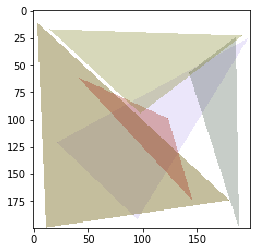

In [98]:
new_img = gen_image_poly(size, polygons)

plt.imshow(new_img)
plt.show()

In [355]:
res

     fun: 12740290.0
 message: 'Optimization terminated successfully.'
    nfev: 4271
     nit: 1
 success: True
       x: array([ 235.73843832,   39.01473457,  170.02697531,   92.79521346,
        131.51491263,   43.61884704,   15.98942881,   69.04863655,
         73.29044723,   19.71564387,    3.02439411,   20.39403712,
         69.97836373,  146.12548534,   98.48339801,  212.27306351,
        199.45287766,   76.30545564,  138.70535651,   89.73147557,
        130.96573296,   77.82751284,  101.04566116,  107.83834307,
        172.67296836,   41.72511164,  170.21511986,   97.7578882 ,
         21.5099158 ,  100.91741198,  229.47040901,   44.46096171,
         89.75256263,  144.9645345 ,  159.64311218,   29.65314098,
        183.12763022,  113.81997462,  136.06309455,  115.63918078,
         33.44524583,  141.85633722,  162.89713465,    8.66395123,
        200.8583989 ,   13.21371094,  103.52604183,  134.24870191,
         27.40532392,  112.46951331,  162.94475442,   84.74564469,
      

### Hill-climbing/ Simulated Annealing

In [74]:
from random import randint, choice, random

In [75]:
# Generate new population randomly based on the bounds
    # bounds - bounds for each parameter of polygon
    # popsize - population size
    # nr_poly - number of polygons
    # nr_vertex - number of vertices

def popul_from_bounds(bounds, popsize, nr_poly, nr_vertex):
    
    population = []
    
    nr_params = 4 + 2*nr_vertex  # 4 - RGBA and then X,Y for vertices
    
    for i in range(0, popsize):
        indv = []

        for j in range(nr_poly):
            polygons = []
            for k in range(nr_params):
                polygons.append(randint(bounds[k][0],bounds[k][1]))
            indv.append(polygons)
        population.append(indv)
        
    return population

In [76]:
popul_from_bounds(bounds=bounds, popsize=1, nr_poly=nr_poly, nr_vertex=nr_vertex)

[[[10, 153, 191, 94, 150, 102, 126, 195, 30, 118, 85, 163, 190, 17],
  [188, 69, 37, 40, 108, 95, 95, 186, 39, 189, 199, 33, 195, 177],
  [38, 223, 145, 18, 83, 156, 177, 46, 154, 45, 140, 85, 166, 106],
  [176, 233, 119, 63, 7, 153, 1, 168, 191, 82, 151, 39, 8, 107],
  [83, 160, 135, 62, 95, 145, 5, 17, 123, 175, 177, 15, 133, 155]]]

In [77]:
def show_img(size, dna, print_mat = False):
    new_img = gen_image_poly(size, np.split(dna, nr_poly))
    plt.imshow(new_img)
    plt.show()


In [111]:
randint(bounds[2][0], bounds[2][1])

155

In [301]:
def hill(orig_img, nr_poly, nr_vertex, iter = 10, mut_rate = 0.05, mut_change = 0.05, mut_random = False):
    
    # Get params
    size = tuple(reversed(orig_img.shape[:2])) # W and H of image
    bounds = get_bounds(nr_poly, nr_vertex, size)
    # Init DNA
    dna = popul_from_bounds(bounds, popsize=1, nr_poly=nr_poly, nr_vertex=nr_vertex)[0]  # Only one element in pop, take 1st
    dna = np.array(dna).flatten()
    #print(dna)
    
    cost_last = cost_poly(nr_poly=nr_poly, orig_mat=orig_img, params=dna)
        
    len_dna = len(dna)
    dna_last = dna
    dna_new = dna_last.copy()
    
    impr = 0
    
    for i in range(iter):    
        
        # Select randomly param to change and change it by mutation rate
        idx = randint(0, len_dna - 1)
        direction = choice([-1,1])  # Select randomly the direction
        limits = bounds[idx]  # limits 
        
        if mut_random:
            dna_new[idx] = randint(limits[0], limits[1])
        else:
            #Mutate
            dna_new[idx] = dna_last[idx] + direction*limits[1]*mut_rate
        
        # Quick limits check
        if dna_new[idx] > limits[1]:
            dna_new[idx] = limits[1]
        elif dna_new[idx] < limits[0]:
            dna_new[idx] = limits[0]
        
        # Calculate new cost
        cost_new = cost_poly(nr_poly=nr_poly, orig_mat=orig_img, params=dna_new)
        
        mut = random()
        
        # Compare costs
        if (mut < mut_change)  or (cost_new < cost_last):
            dna_last = dna_new.copy()
            cost_last = cost_new
            impr += 1
        else:
            dna_new = dna_last.copy()
            
        if i % 1000 == 0:
            print("Iteration", i)
            print("improvements", impr)
            fit = cost_last/(255*255*3*size[0]*size[1])
            print("Fitness: ", 1-fit)
            show_img(size, dna_last)
        
    
    show_img(size, dna_last)
    return dna_last

Atm works only with 5 polygons for some reason.

Iteration 0
improvements 0


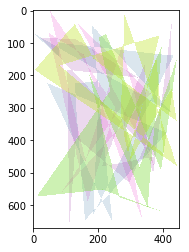

Iteration 1000
improvements 284


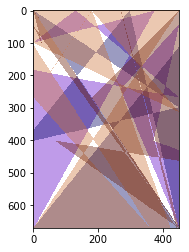

Iteration 2000
improvements 437


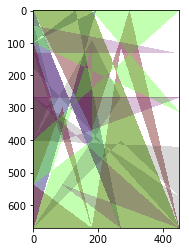

Iteration 3000
improvements 579


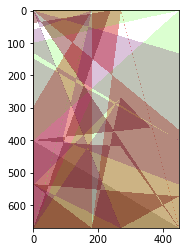

Iteration 4000
improvements 695


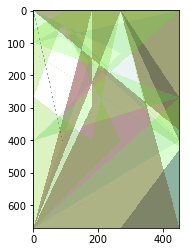

KeyboardInterrupt: 

In [79]:
hill(orig_mat, 10, 6, 10000, mut_rate=0.1)

Iteration 0
improvements 0


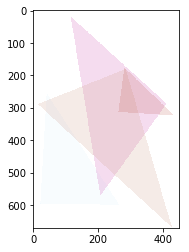

Iteration 1000
improvements 361


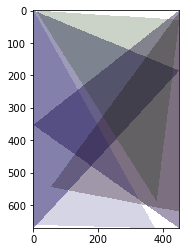

Iteration 2000
improvements 522


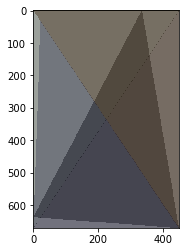

Iteration 3000
improvements 606


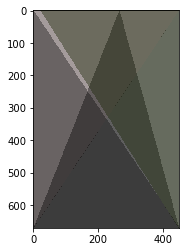

Iteration 4000
improvements 691


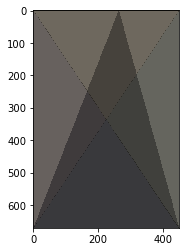

Iteration 5000
improvements 782


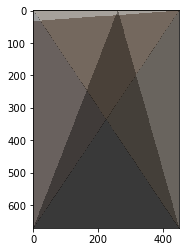

Iteration 6000
improvements 881


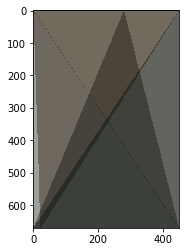

Iteration 7000
improvements 990


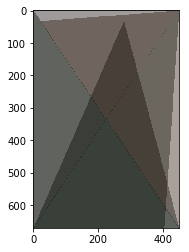

Iteration 8000
improvements 1097


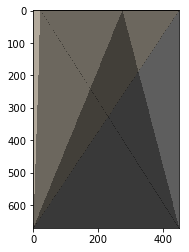

Iteration 9000
improvements 1204


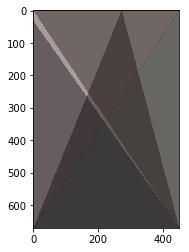

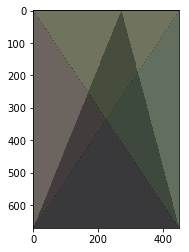

array([ 56,  22,   0, 100,   1, 671, 450,   1,   1,   1,   0,   0,   0,
       100, 449, 671, 450,   1,   1, 671,   0,   0,  12, 100,   1, 670,
       272,   1, 450, 671,  10,  41,   0, 100, 450, 671,   1,   1, 449,
         1,   0,   0,   0, 100,   1,   1, 450, 671,   1, 671])

In [80]:
hill(orig_mat, 5, 3, 10000, mut_rate=0.05)

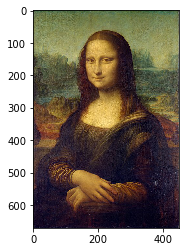

In [83]:
plt.imshow(orig_mat)
plt.show()

Iteration 0
improvements 0


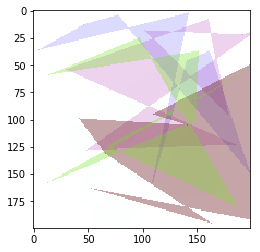

Iteration 1000
improvements 399


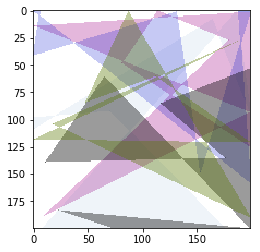

Iteration 2000
improvements 682


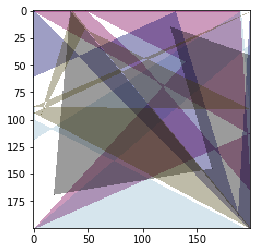

Iteration 3000
improvements 871


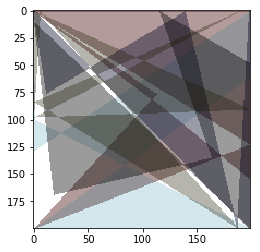

Iteration 4000
improvements 1013


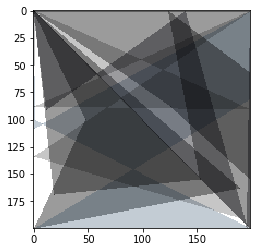

Iteration 5000
improvements 1117


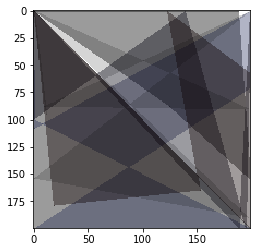

Iteration 6000
improvements 1227


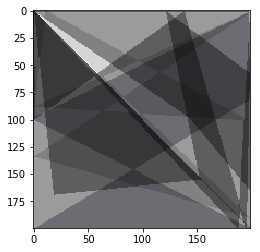

Iteration 7000
improvements 1333


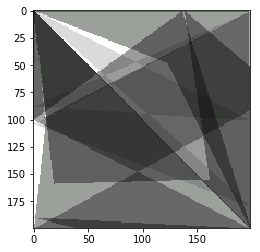

Iteration 8000
improvements 1419


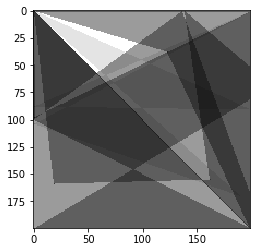

Iteration 9000
improvements 1505


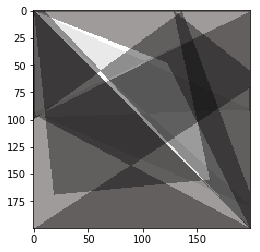

Iteration 10000
improvements 1595


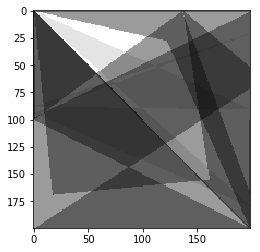

Iteration 11000
improvements 1666


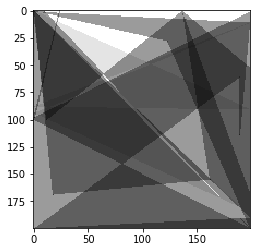

Iteration 12000
improvements 1753


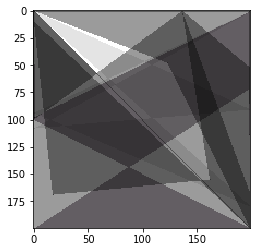

Iteration 13000
improvements 1866


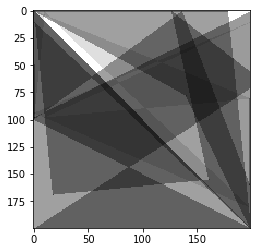

Iteration 14000
improvements 1976


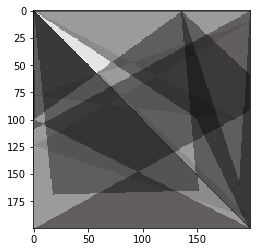

Iteration 15000
improvements 2055


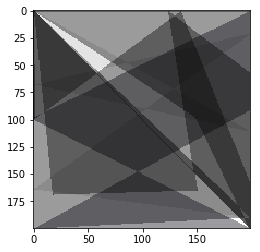

Iteration 16000
improvements 2170


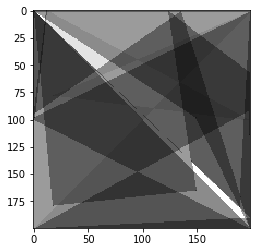

Iteration 17000
improvements 2248


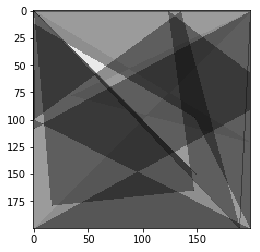

Iteration 18000
improvements 2354


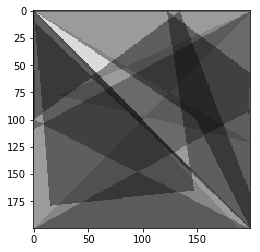

Iteration 19000
improvements 2449


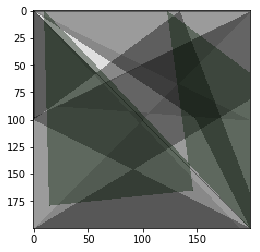

Iteration 20000
improvements 2544


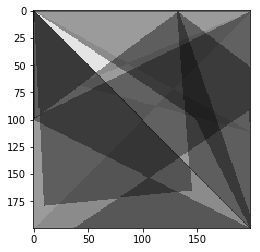

Iteration 21000
improvements 2621


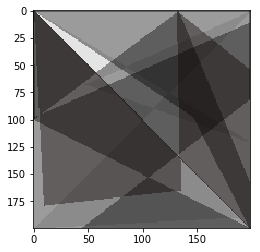

Iteration 22000
improvements 2748


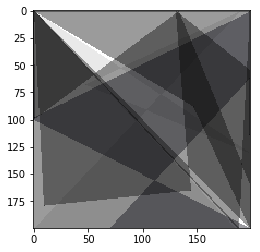

Iteration 23000
improvements 2845


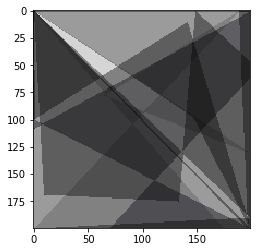

Iteration 24000
improvements 2942


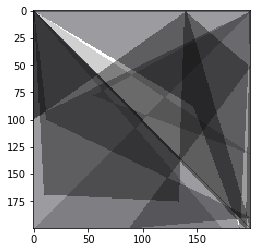

Iteration 25000
improvements 3026


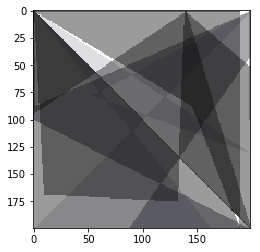

Iteration 26000
improvements 3137


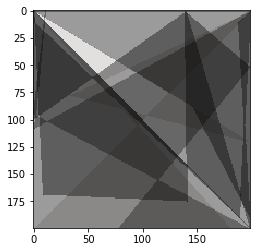

Iteration 27000
improvements 3256


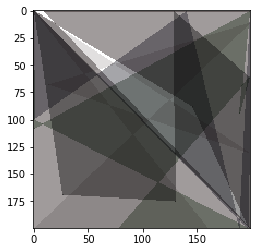

Iteration 28000
improvements 3348


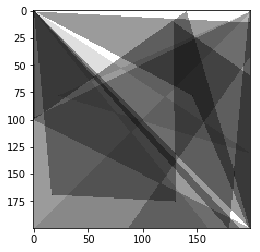

Iteration 29000
improvements 3448


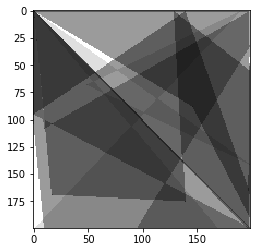

Iteration 30000
improvements 3547


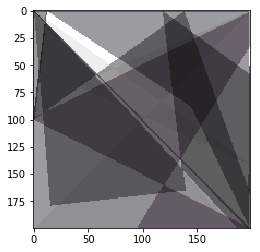

Iteration 31000
improvements 3646


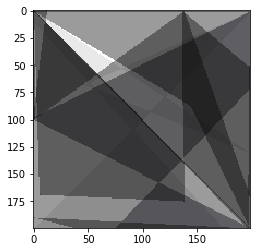

Iteration 32000
improvements 3723


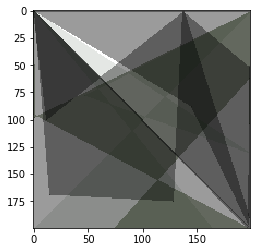

Iteration 33000
improvements 3825


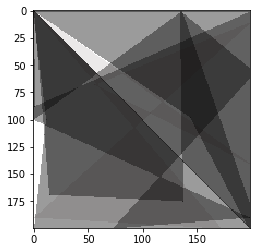

Iteration 34000
improvements 3928


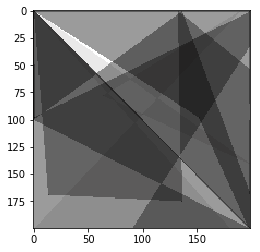

Iteration 35000
improvements 4025


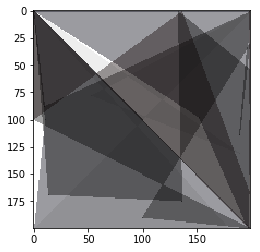

Iteration 36000
improvements 4099


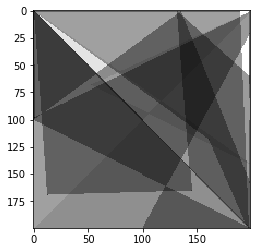

Iteration 37000
improvements 4200


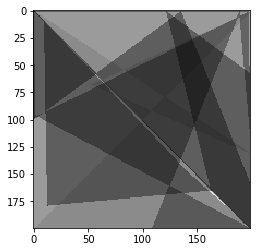

Iteration 38000
improvements 4318


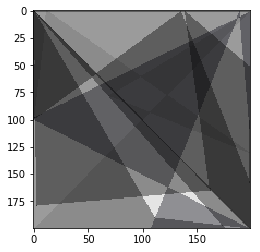

Iteration 39000
improvements 4405


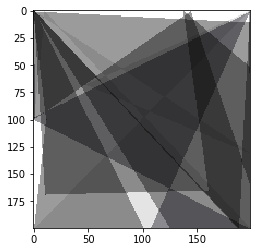

Iteration 40000
improvements 4513


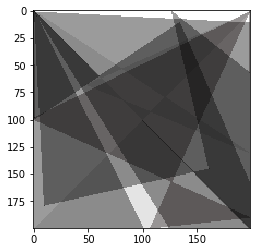

Iteration 41000
improvements 4615


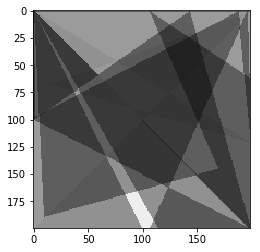

Iteration 42000
improvements 4694


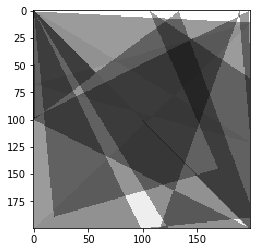

Iteration 43000
improvements 4790


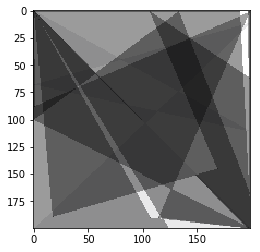

Iteration 44000
improvements 4881


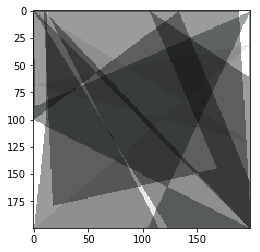

Iteration 45000
improvements 4988


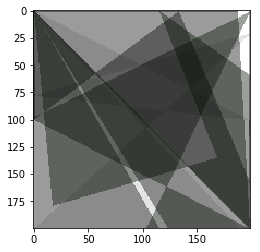

Iteration 46000
improvements 5103


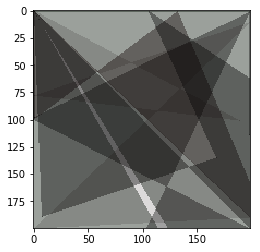

Iteration 47000
improvements 5208


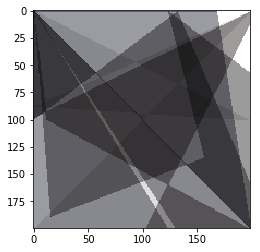

Iteration 48000
improvements 5312


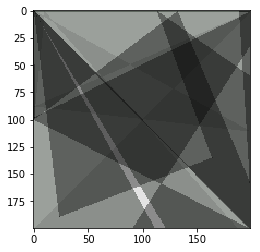

Iteration 49000
improvements 5429


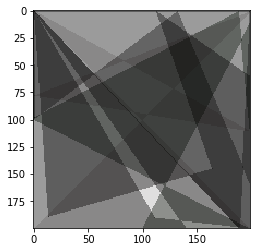

Iteration 50000
improvements 5537


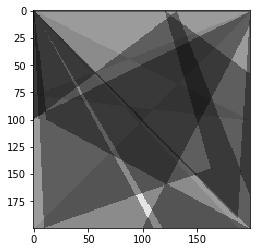

Iteration 51000
improvements 5643


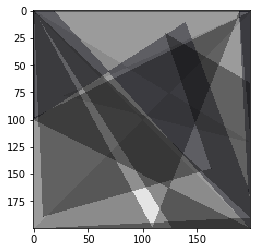

Iteration 52000
improvements 5761


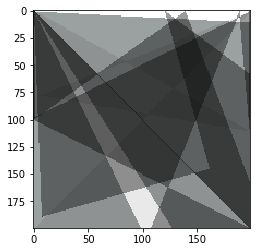

Iteration 53000
improvements 5847


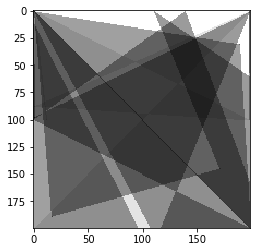

Iteration 54000
improvements 5963


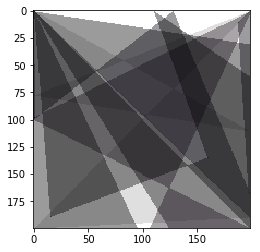

Iteration 55000
improvements 6052


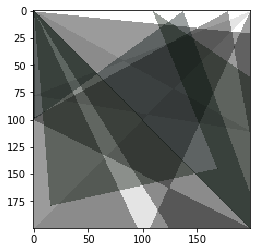

Iteration 56000
improvements 6119


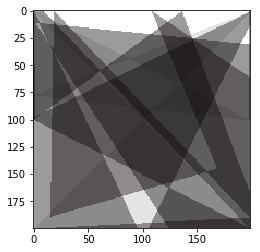

Iteration 57000
improvements 6206


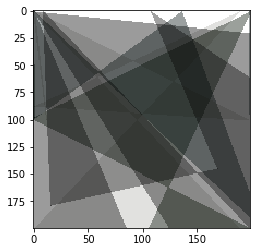

Iteration 58000
improvements 6329


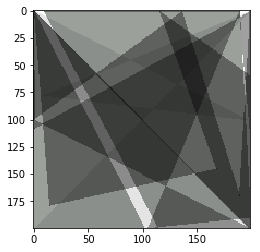

Iteration 59000
improvements 6438


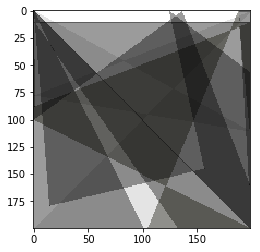

Iteration 60000
improvements 6525


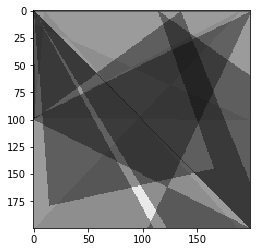

Iteration 61000
improvements 6619


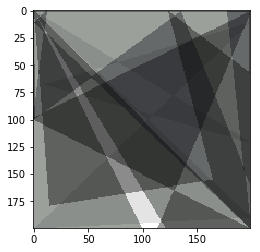

Iteration 62000
improvements 6733


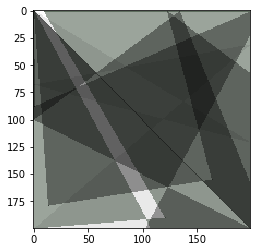

Iteration 63000
improvements 6823


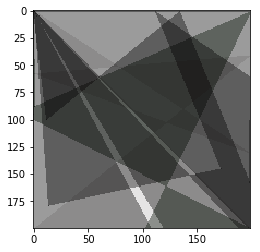

Iteration 64000
improvements 6913


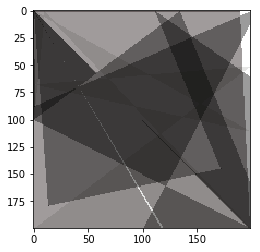

Iteration 65000
improvements 7000


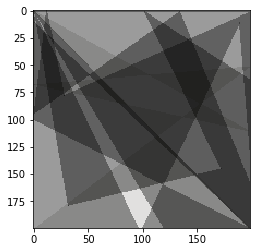

Iteration 66000
improvements 7104


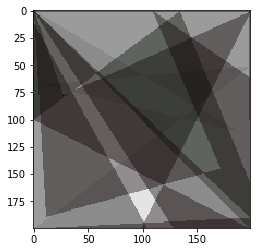

Iteration 67000
improvements 7213


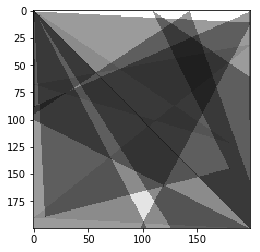

Iteration 68000
improvements 7290


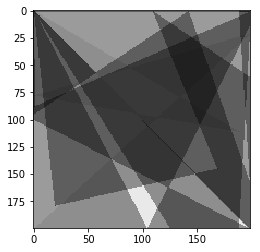

Iteration 69000
improvements 7376


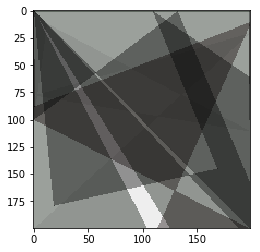

Iteration 70000
improvements 7506


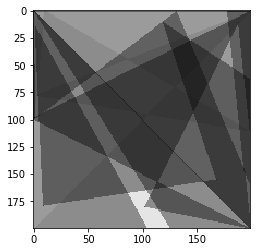

Iteration 71000
improvements 7583


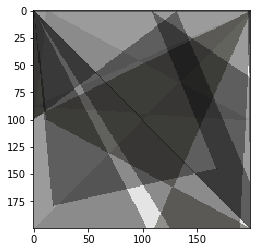

Iteration 72000
improvements 7669


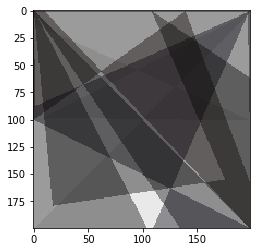

Iteration 73000
improvements 7748


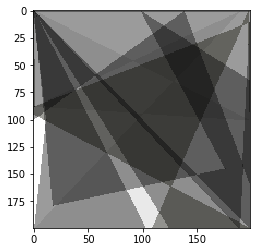

Iteration 74000
improvements 7851


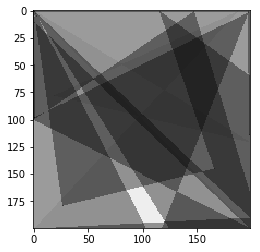

Iteration 75000
improvements 7945


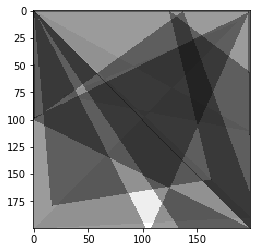

Iteration 76000
improvements 8047


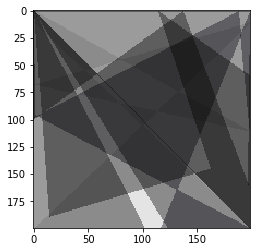

Iteration 77000
improvements 8126


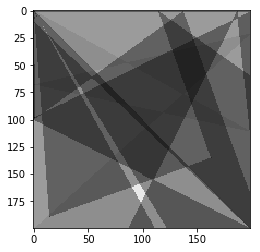

Iteration 78000
improvements 8223


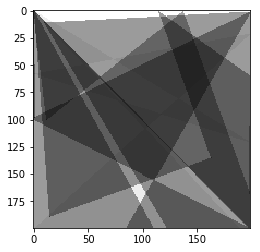

Iteration 79000
improvements 8324


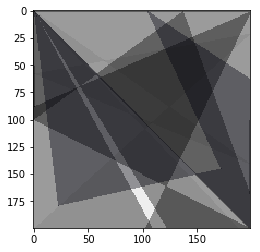

Iteration 80000
improvements 8383


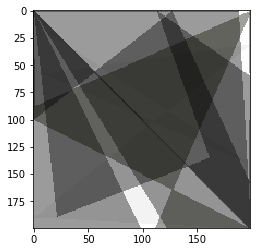

Iteration 81000
improvements 8483


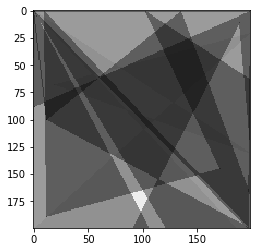

Iteration 82000
improvements 8577


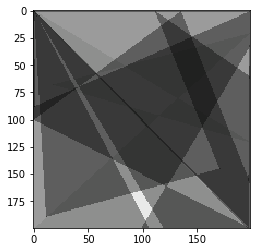

Iteration 83000
improvements 8663


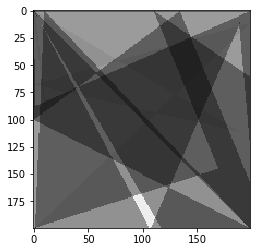

Iteration 84000
improvements 8742


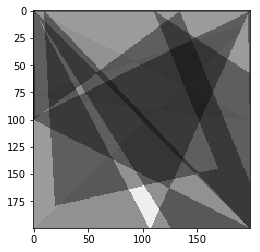

Iteration 85000
improvements 8825


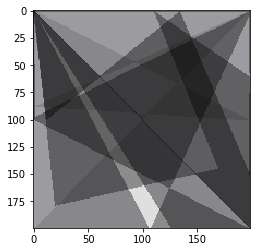

Iteration 86000
improvements 8911


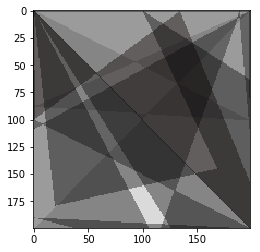

Iteration 87000
improvements 9026


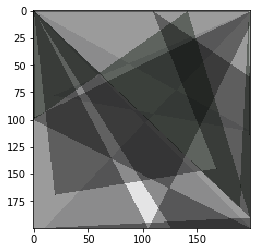

Iteration 88000
improvements 9105


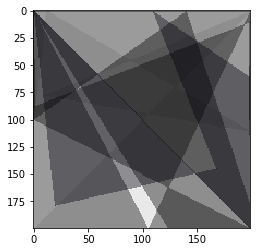

Iteration 89000
improvements 9201


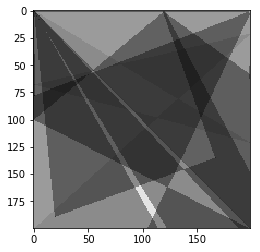

Iteration 90000
improvements 9322


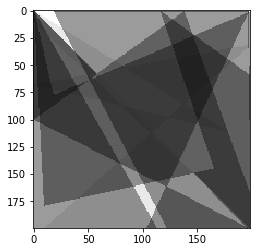

Iteration 91000
improvements 9437


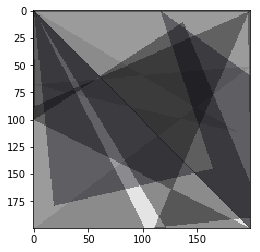

Iteration 92000
improvements 9525


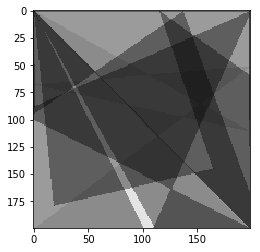

Iteration 93000
improvements 9615


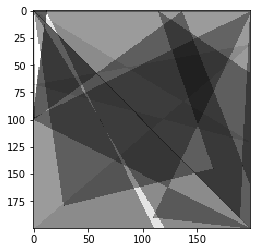

Iteration 94000
improvements 9712


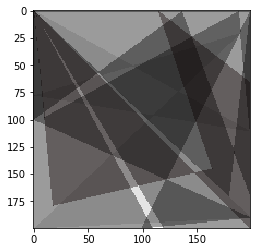

Iteration 95000
improvements 9821


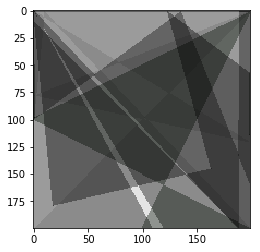

Iteration 96000
improvements 9917


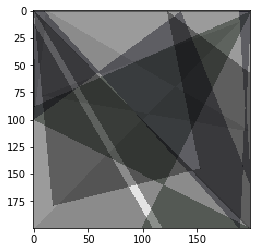

Iteration 97000
improvements 10043


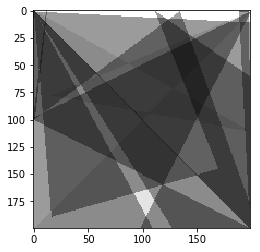

Iteration 98000
improvements 10133


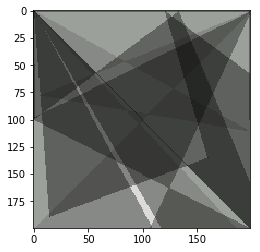

Iteration 99000
improvements 10224


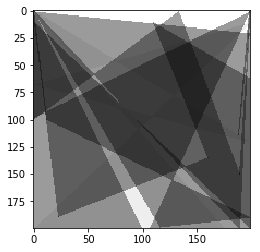

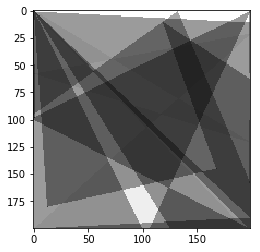

array([  0,   0,   0, 100, 199,  11, 199, 200,  99, 200,   0,   0,   0,
        95,   1, 200, 126, 200,   1,   1,   0,   0,   0, 100, 199, 114,
       198,   1,   1,  98,   0,   0,   0, 100, 198, 200, 107, 200, 198,
         1,   0,   0,   0,  90, 199,   1, 198, 200,   1,   1,   0,   0,
         0,  95, 132,   1, 199, 160, 199,   1,   0,   0,   0, 100,   1,
         1, 199, 190,   1, 200, 255, 255, 255, 100, 119,  11, 168, 145,
        13, 180,   0,   0,   0,  17, 199,  21,   1,  58, 199, 121,   0,
         0,   0, 100,   1,   1, 193, 200,   1, 200])

In [88]:
orig_mat = np.array(darwin)
hill(orig_mat, 10, 3, 100000, mut_rate=0.05)

Iteration 0
improvements 0
Fitness:  0.727154362998


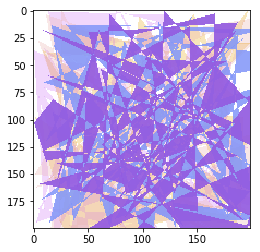

Iteration 1000
improvements 504
Fitness:  0.801676209575


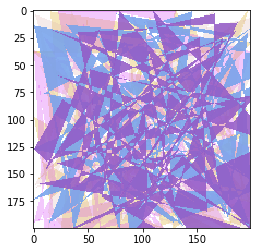

Iteration 2000
improvements 956
Fitness:  0.855018288804


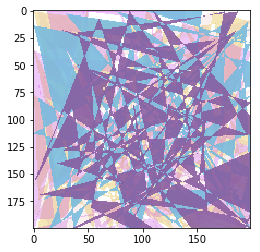

Iteration 3000
improvements 1377
Fitness:  0.895556098318


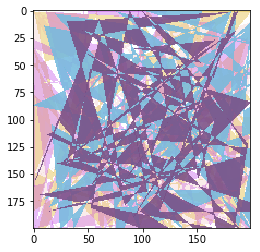

Iteration 4000
improvements 1773
Fitness:  0.921461375054


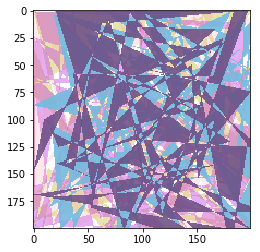

Iteration 5000
improvements 2147
Fitness:  0.942105082506


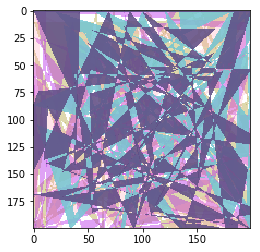

Iteration 6000
improvements 2475
Fitness:  0.952851185184


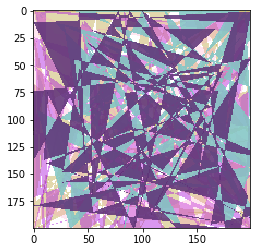

Iteration 7000
improvements 2799
Fitness:  0.963352760728


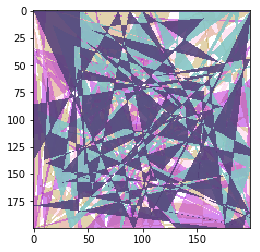

Iteration 8000
improvements 3106
Fitness:  0.968327564131


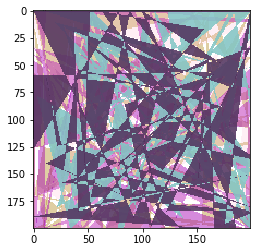

Iteration 9000
improvements 3405
Fitness:  0.970953879097


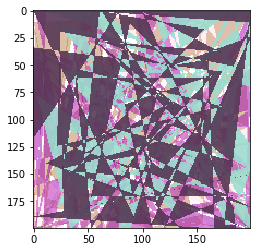

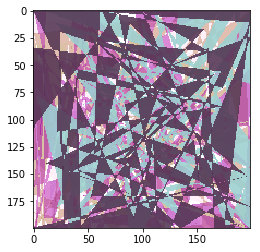

array([170, 118,  48, 113, 199, 118, 199, 200,  10, 181, 189,  62, 145,
         1, 166,  65, 128,   0,  12, 108,  28, 123,  67, 190, 123,  66,
       189, 105, 165,  11,  80,  18,  28, 137, 107, 255,  77, 200, 199,
        22, 124,  48, 154,  62, 112, 133, 199, 165,  65,  12,  45, 255,
         1,  27,   1, 121,   1, 169, 107, 200,  94,  14, 199, 153,   0,
        86,  12, 255,  38,   1,  23, 190,   1, 185,  19, 200, 110, 144,
       160,   1, 155, 196,   0, 212, 192, 200,  89, 188, 169,   1, 134,
         1,  92,  62,   1, 200,  35,  12,  12, 255, 199, 200,  72, 121,
       199, 105,  10, 200,   1,  68, 120, 200, 114, 109, 211, 116,  49,
       159,  91,  18, 189, 179, 143, 180, 112,  51, 114, 175, 214, 196,
         0, 226, 163,   1,   1,  21,  23, 111, 199,   1, 116, 200,  61,
        76,  38, 184, 195,  60, 196, 101, 198, 176,  38, 103, 121,  95,
       152,  79,  73,  93, 164,   0, 166, 129, 110, 166, 176, 136,  10,
        37,  10, 190, 119, 200,  35,  79,  81,  93,  13, 255, 19

In [303]:
hill(orig_mat, 50, 6, 10000, mut_rate=0.05)

Iteration 0
improvements 1
Fit:  106.014451736


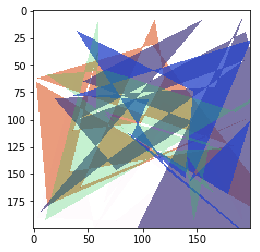

Iteration 1000
improvements 255
Fit:  23.6183070582


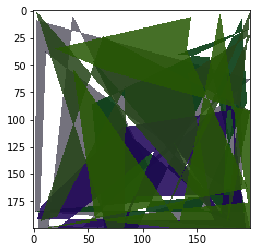

Iteration 2000
improvements 416
Fit:  16.2177130095


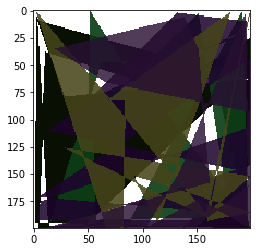

Iteration 3000
improvements 524
Fit:  13.276046507


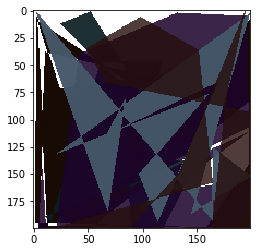

Iteration 4000
improvements 600
Fit:  12.037167537


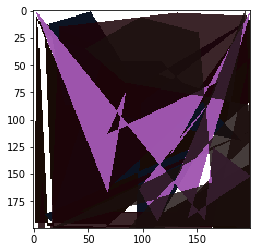

Iteration 5000
improvements 658
Fit:  11.366195323


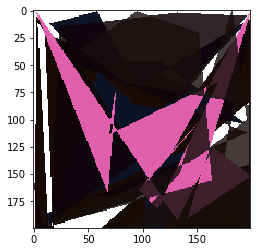

Iteration 6000
improvements 714
Fit:  10.5556783591


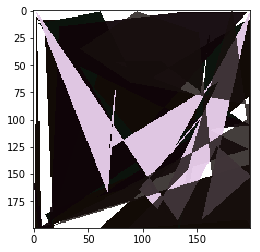

Iteration 7000
improvements 748
Fit:  9.80679439682


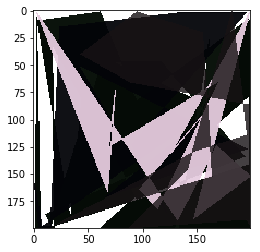

Iteration 8000
improvements 779
Fit:  9.38977896016


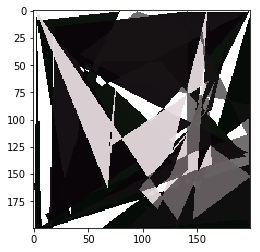

Iteration 9000
improvements 814
Fit:  8.76636161198


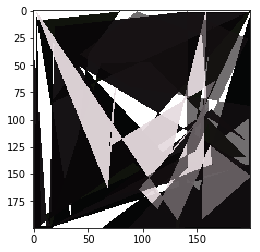

Iteration 10000
improvements 851
Fit:  7.43055003777


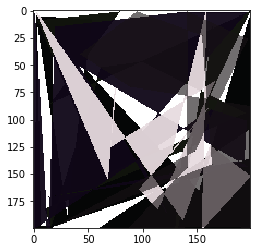

Iteration 11000
improvements 888
Fit:  7.16306568792


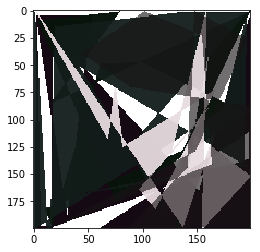

Iteration 12000
improvements 902
Fit:  7.13076539561


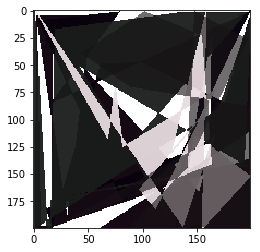

Iteration 13000
improvements 921
Fit:  6.97561414918


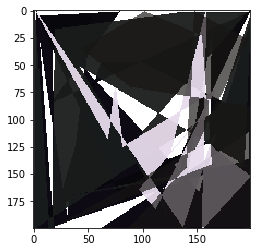

Iteration 14000
improvements 932
Fit:  6.35936085657


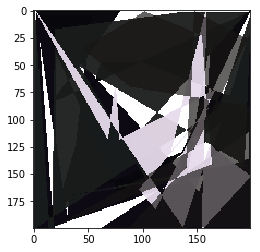

Iteration 15000
improvements 951
Fit:  6.03251193878


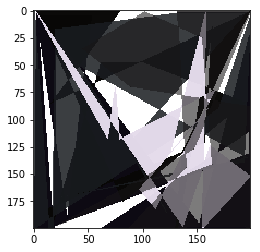

Iteration 16000
improvements 962
Fit:  5.99998742076


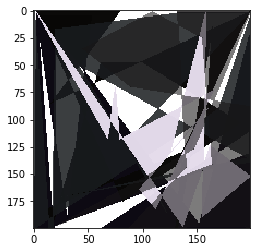

Iteration 17000
improvements 975
Fit:  5.95265050744


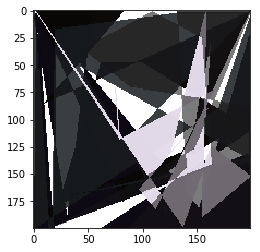

Iteration 18000
improvements 981
Fit:  5.94569783558


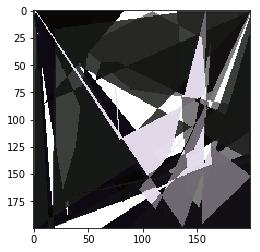

Iteration 19000
improvements 996
Fit:  5.85181558117


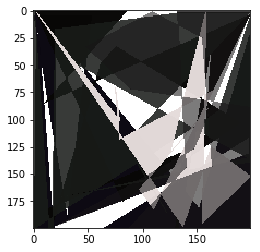

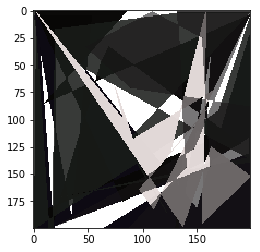

array([ 11,   8,  17, 253,   1,   6,   3,   1,  18, 198, 198, 131, 198,
        23, 150, 182,  20,  20,  19, 228, 198, 116, 198, 199,   1, 200,
         3,   5,  53,   5,  35, 192,   8,   7,   6, 252, 190, 122,  82,
       175,   2,   1,  85,   1,  10,  85, 198,   4, 137, 129, 128, 224,
       164,  29, 157, 121,  13, 182,  17, 198,  62,  48,  69,  33,  25,
        28,  25, 221, 196, 135,  41,  50, 122, 185,  85, 121, 198,   2,
       132,   2,  20,  17,  17, 241,   1,   1,   1, 200, 170,  92, 199,
         5, 198, 139,  26, 171, 228, 219, 218, 250, 125, 131, 160,  90,
        97, 164, 110, 182, 165,  73,  91, 118,  75,  71,  83, 101,   3,
         2, 137, 198, 163, 125, 199, 152, 155, 195, 158,   2,  23,  21,
        22, 149, 147, 127, 199,   1, 132,   1, 140, 144,  87, 200, 194,
       200, 237, 248, 243,  95,  89,  71,  48,  33, 109,   1, 155,  25,
       162, 143,  22, 197])

In [296]:
hill(orig_mat, 10, 6, 20000, mut_random = True, mut_change = 0.0)

Iteration 0
improvements 0
Fitness:  0.633148750416


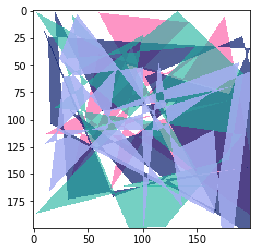

Iteration 1000
improvements 270
Fitness:  0.879717329438


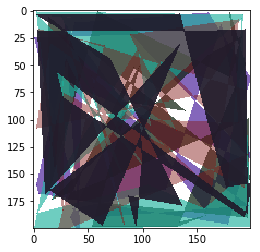

Iteration 2000
improvements 466
Fitness:  0.941451909039


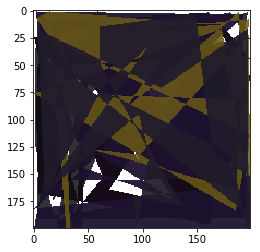

Iteration 3000
improvements 592
Fitness:  0.957807459829


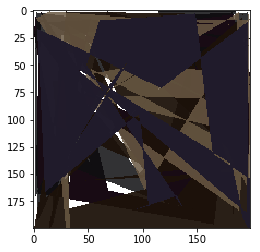

Iteration 4000
improvements 708
Fitness:  0.965586887017


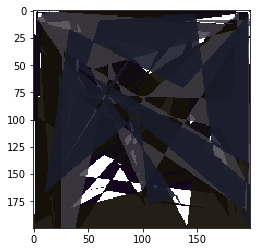

Iteration 5000
improvements 781
Fitness:  0.968611235725


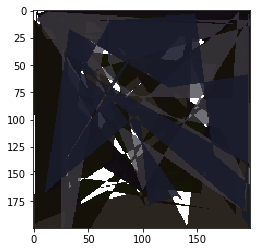

Iteration 6000
improvements 842
Fitness:  0.970001439596


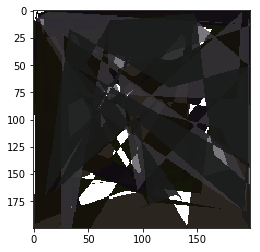

Iteration 7000
improvements 914
Fitness:  0.97204006847


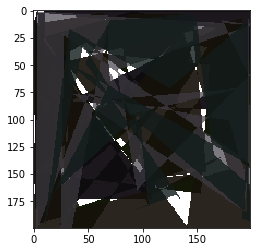

Iteration 8000
improvements 943
Fitness:  0.972635766684


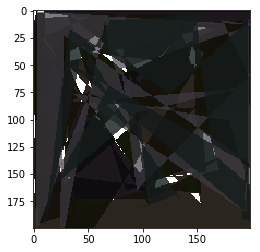

Iteration 9000
improvements 970
Fitness:  0.973136522031


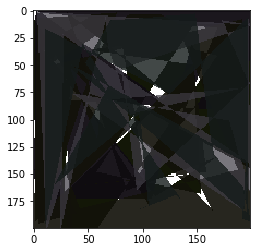

Iteration 10000
improvements 999
Fitness:  0.9742423007


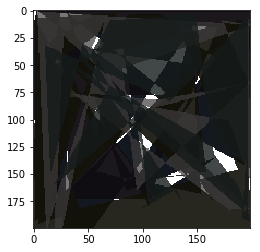

Iteration 11000
improvements 1034
Fitness:  0.974948128055


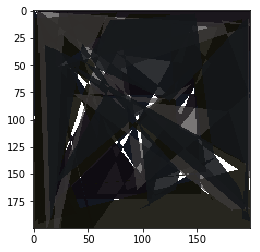

Iteration 12000
improvements 1071
Fitness:  0.975923590914


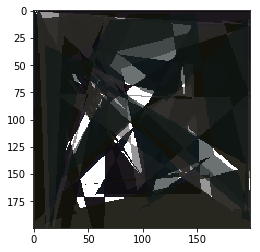

Iteration 13000
improvements 1103
Fitness:  0.976476137061


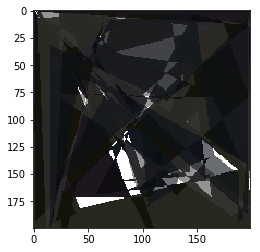

Iteration 14000
improvements 1139
Fitness:  0.976874807203


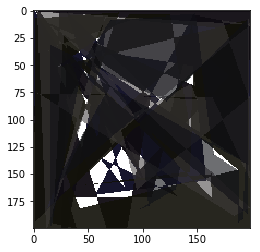

Iteration 15000
improvements 1161
Fitness:  0.977241876305


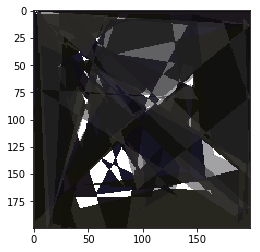

Iteration 16000
improvements 1174
Fitness:  0.977326295581


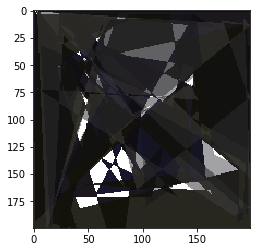

Iteration 17000
improvements 1193
Fitness:  0.977623615579


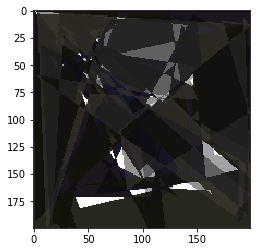

Iteration 18000
improvements 1212
Fitness:  0.977856197816


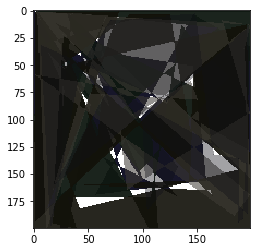

Iteration 19000
improvements 1237
Fitness:  0.978040523005


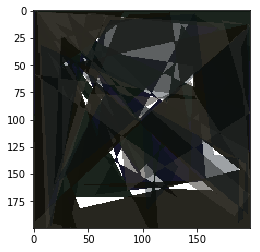

Iteration 20000
improvements 1258
Fitness:  0.978266225656


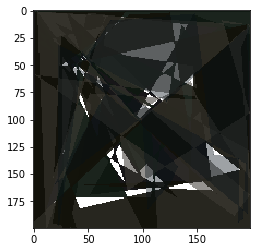

Iteration 21000
improvements 1282
Fitness:  0.978419862223


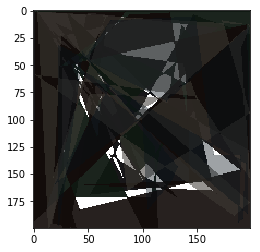

Iteration 22000
improvements 1294
Fitness:  0.978583961458


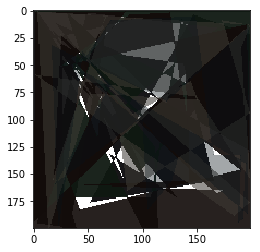

Iteration 23000
improvements 1309
Fitness:  0.978706776739


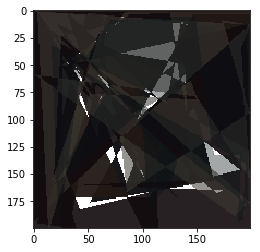

Iteration 24000
improvements 1339
Fitness:  0.978860132393


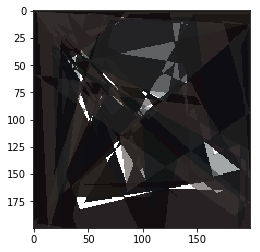

Iteration 25000
improvements 1357
Fitness:  0.978997562463


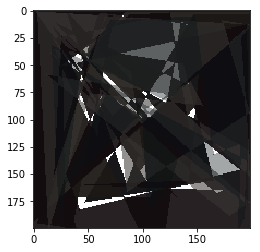

Iteration 26000
improvements 1372
Fitness:  0.979140180333


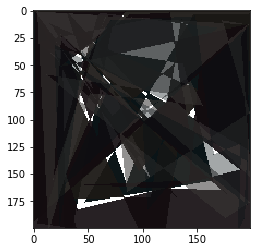

Iteration 27000
improvements 1384
Fitness:  0.979354003131


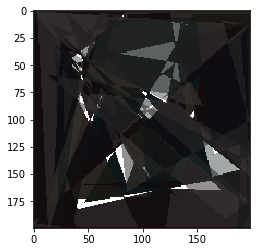

Iteration 28000
improvements 1398
Fitness:  0.979394650943


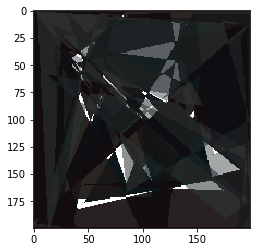

Iteration 29000
improvements 1420
Fitness:  0.979541728893


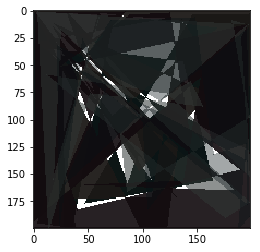

Iteration 30000
improvements 1431
Fitness:  0.979641724321


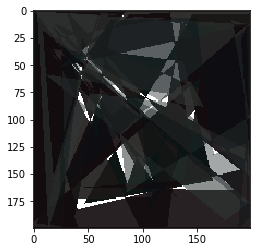

Iteration 31000
improvements 1444
Fitness:  0.979766741306


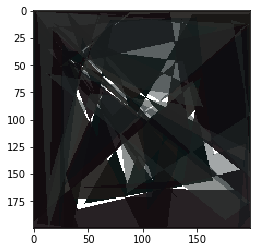

Iteration 32000
improvements 1454
Fitness:  0.979822922636


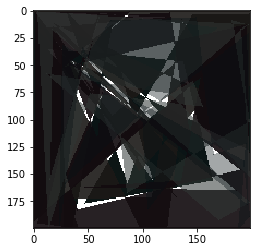

Iteration 33000
improvements 1466
Fitness:  0.979904115606


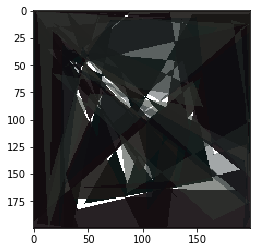

Iteration 34000
improvements 1478
Fitness:  0.98006080988


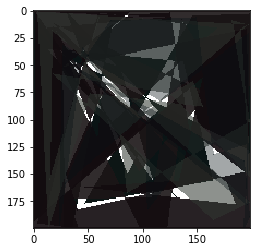

Iteration 35000
improvements 1491
Fitness:  0.980120592325


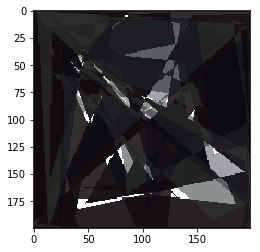

Iteration 36000
improvements 1500
Fitness:  0.980165790763


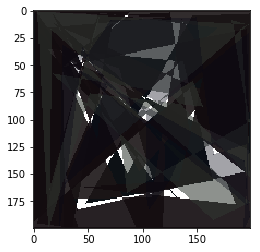

Iteration 37000
improvements 1512
Fitness:  0.980240689414


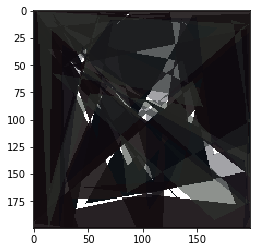

Iteration 38000
improvements 1520
Fitness:  0.980260604831


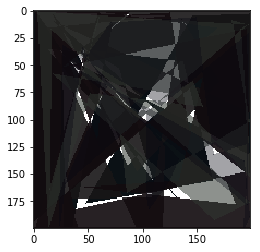

Iteration 39000
improvements 1524
Fitness:  0.980267078697


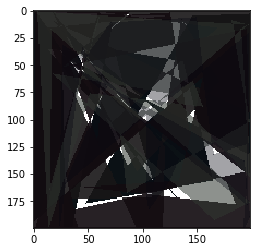

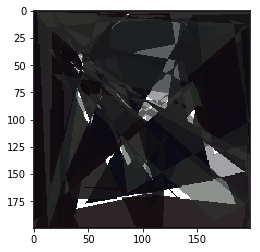

array([  7,   8,  17, 251, 111, 159,  79,  53,  75,  36, 138,  47, 164,
       156,  48, 177, 146,   5, 198,   3, 199, 167, 198, 132,  26,  41,
        29, 230,  72,  12,  41,  38,  12,  35, 131, 171,  96, 132,  86,
       143,  31,  20, 115,  93,   1, 193,   1,   1,  23,  21,  22, 230,
        31, 173,  41, 200,   2, 200,  60,   1, 169,  16,  72, 103,   2,
         1, 199,   1, 198,  93,  19,  10, 120, 125, 117, 246,   1,   1,
       121,   5,   2,  17,  96, 102,  18,   2,  95, 147, 171,  65, 150,
        31, 136,   8, 109, 171,  18,  11,  15, 227, 195,  17, 199, 199,
         1, 199,   2,   2,  88,   1,  47,  37,  11, 184, 156,  60, 134,
       162,  47, 162, 186, 178, 178, 158,  32,  47,  59, 121,  63,  75,
        30, 150,  37, 183, 194, 148, 142, 109, 125,   2,  88,   4,  26,
        52,  48,  54,  48, 140, 198, 102,  86, 167,  80, 114, 195,  14,
       190,  17, 199, 153, 125,  76,  18,  58, 166, 192, 198, 176,  16,
        17,  15, 164,  60,   6,  48,  51,  96,  94, 146,  65, 15

In [304]:
hill(orig_mat, 10, 10, 40000, mut_random = True, mut_change = 0.0)

Iteration 0
improvements 0
Fit:  0.367315108414


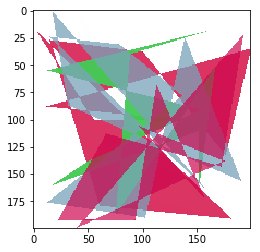

Iteration 1000
improvements 162
Fit:  0.147881698638


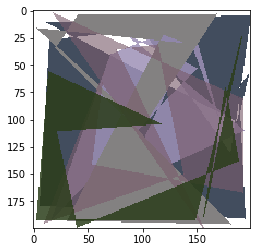

Iteration 2000
improvements 269
Fit:  0.0904820104624


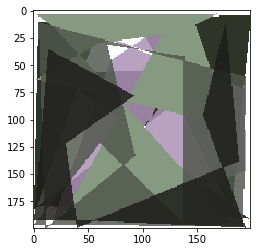

Iteration 3000
improvements 331
Fit:  0.0608342319054


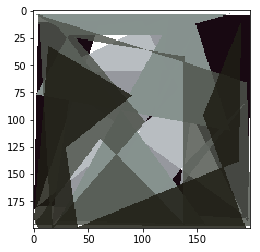

Iteration 4000
improvements 366
Fit:  0.0540826167232


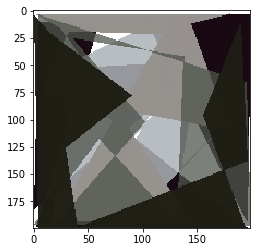

Iteration 5000
improvements 405
Fit:  0.0517795366683


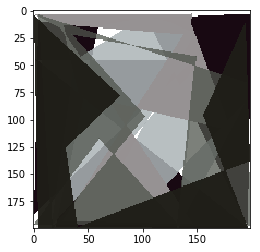

Iteration 6000
improvements 432
Fit:  0.0472517810119


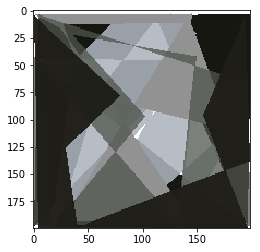

Iteration 7000
improvements 469
Fit:  0.0425842592432


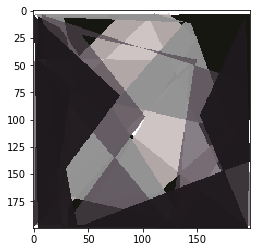

Iteration 8000
improvements 485
Fit:  0.041693496703


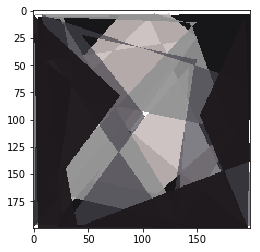

Iteration 9000
improvements 506
Fit:  0.0357076856795


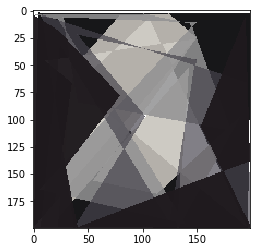

Iteration 10000
improvements 525
Fit:  0.0342673381002


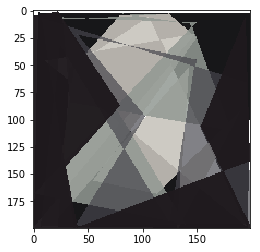

Iteration 11000
improvements 535
Fit:  0.0340690297573


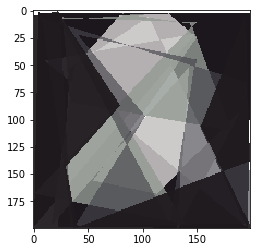

Iteration 12000
improvements 546
Fit:  0.033218622138


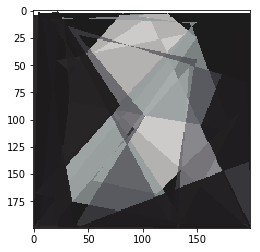

Iteration 13000
improvements 553
Fit:  0.0329936839136


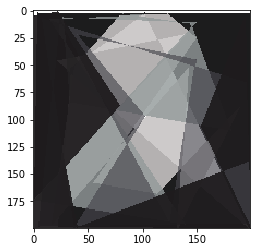

Iteration 14000
improvements 564
Fit:  0.0323589298537


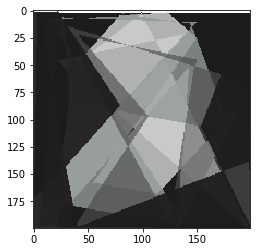

Iteration 15000
improvements 575
Fit:  0.0321791652096


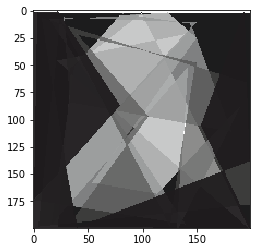

Iteration 16000
improvements 587
Fit:  0.0320340845584


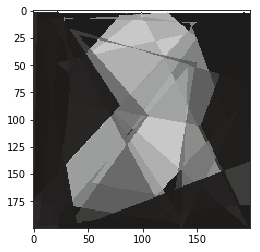

Iteration 17000
improvements 598
Fit:  0.031940411142


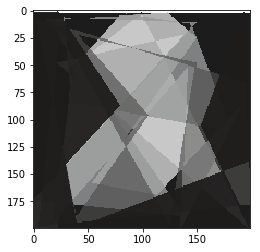

Iteration 18000
improvements 611
Fit:  0.0245331002056


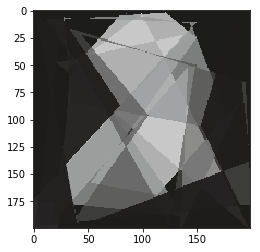

Iteration 19000
improvements 620
Fit:  0.0244864553448


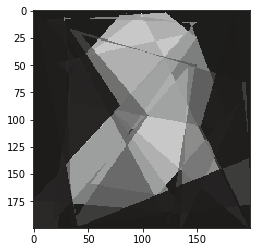

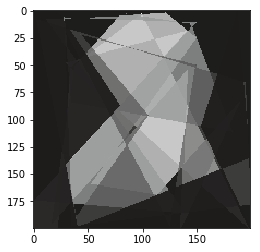

array([ 28,  28,  27, 254,  33,  53,  99,   2, 198, 200, 199,   1,   1,
         1,   1, 173, 142,  18,  29,  48, 197, 200,  23, 200, 194, 193,
       194, 228,  53, 159, 149,  25, 121,   2,  79,   5,  38,  51,  17,
       195, 141,  55, 135, 200, 189,  84, 113, 169, 151, 153, 153, 201,
         1, 174, 139, 186,  12,   8, 101,   4,  85,   3, 144,  12, 182,
       111,  35,  84,  28,   6, 149,  11,  77,  77,  76, 165,  35, 198,
        28,  16, 125, 197, 149,  50,  43,  22, 105,  96,  39, 190,   3,
         8, 194,  66, 199, 178,  30,  27,  27, 240,  29, 141,  79,  87,
        22,   1,   1,   2,   1, 200, 199, 200, 154, 106, 187,   2, 198,
       135,  40, 199])

In [291]:
hill(orig_mat, 5, 10, 20000, mut_random=True, mut_change=-1)

Iteration 0
improvements 1
Fitness:  0.619855609973


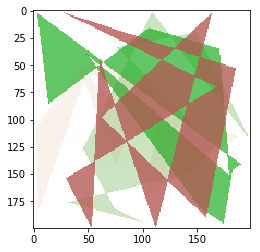

Iteration 1000
improvements 218
Fitness:  0.932486249651


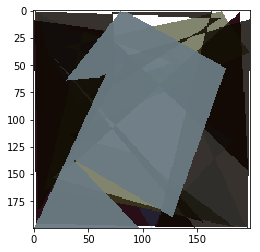

Iteration 2000
improvements 298
Fitness:  0.944478941806


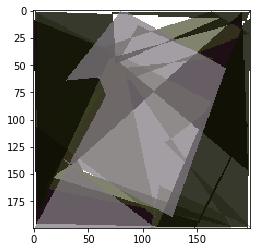

Iteration 3000
improvements 355
Fitness:  0.949502410038


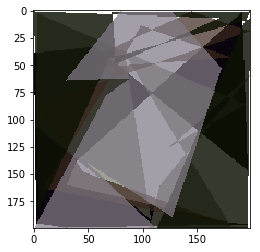

Iteration 4000
improvements 397
Fitness:  0.955754003389


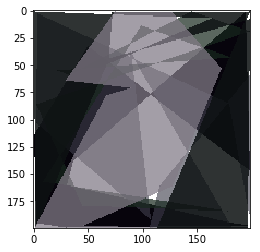

Iteration 5000
improvements 437
Fitness:  0.958634865601


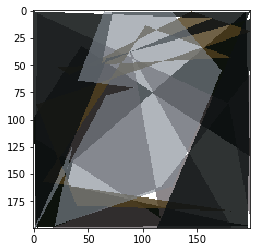

Iteration 6000
improvements 477
Fitness:  0.962261667559


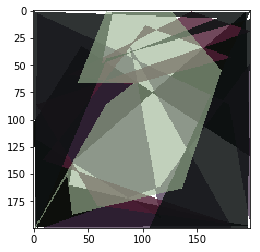

Iteration 7000
improvements 511
Fitness:  0.964359235496


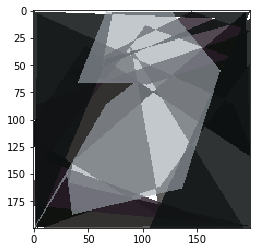

Iteration 8000
improvements 528
Fitness:  0.96484219122


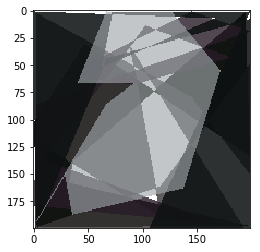

Iteration 9000
improvements 545
Fitness:  0.96533089322


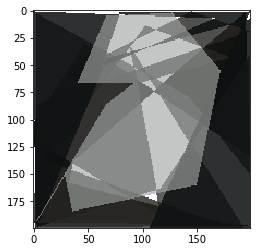

Iteration 10000
improvements 562
Fitness:  0.96659071804


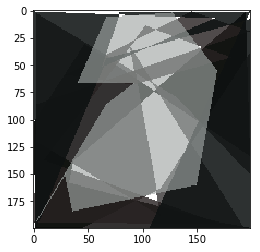

Iteration 11000
improvements 582
Fitness:  0.967088568306


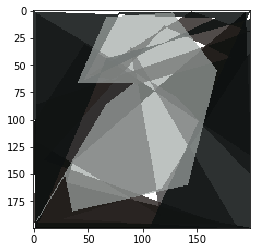

Iteration 12000
improvements 590
Fitness:  0.967339131516


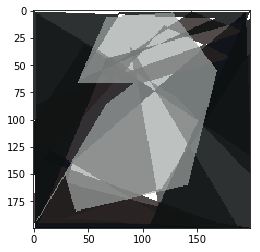

Iteration 13000
improvements 610
Fitness:  0.969344929183


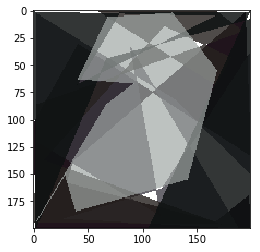

Iteration 14000
improvements 637
Fitness:  0.972071894523


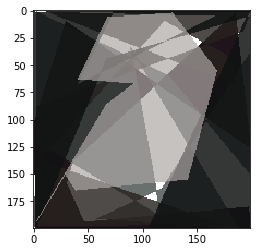

Iteration 15000
improvements 656
Fitness:  0.973788470354


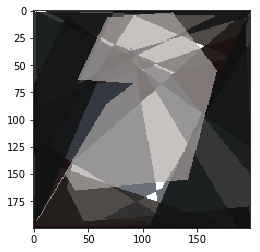

Iteration 16000
improvements 672
Fitness:  0.974454151315


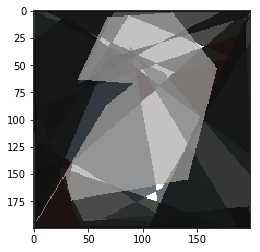

Iteration 17000
improvements 688
Fitness:  0.97485798633


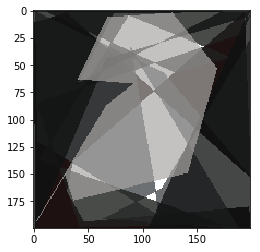

Iteration 18000
improvements 699
Fitness:  0.975064088738


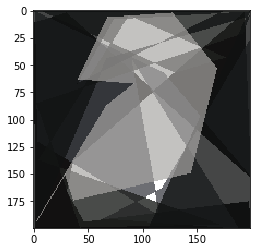

Iteration 19000
improvements 704
Fitness:  0.975218696584


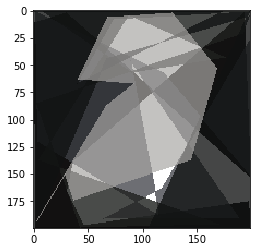

Iteration 20000
improvements 709
Fitness:  0.975280811722


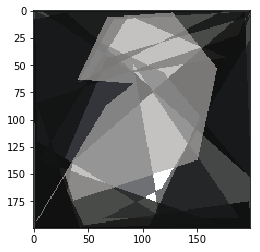

Iteration 21000
improvements 715
Fitness:  0.975318100949


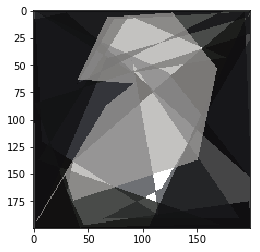

Iteration 22000
improvements 722
Fitness:  0.975409790462


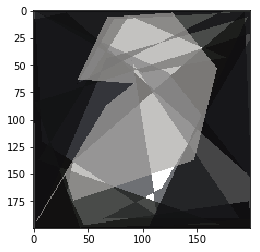

Iteration 23000
improvements 729
Fitness:  0.975455248819


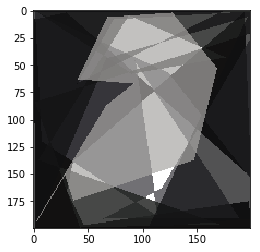

Iteration 24000
improvements 735
Fitness:  0.975522277671


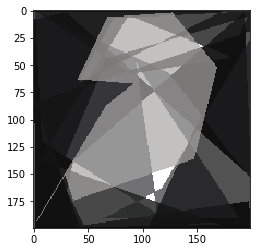

Iteration 25000
improvements 740
Fitness:  0.975541474385


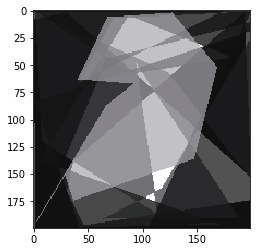

Iteration 26000
improvements 753
Fitness:  0.975688717972


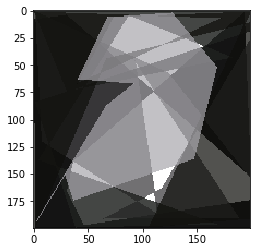

Iteration 27000
improvements 757
Fitness:  0.975766279945


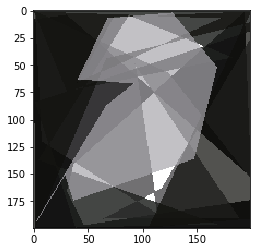

Iteration 28000
improvements 765
Fitness:  0.975801956341


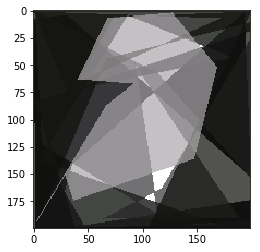

Iteration 29000
improvements 773
Fitness:  0.975807288654


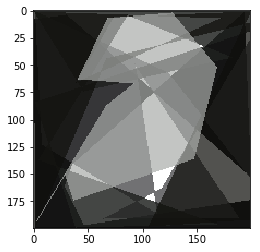

Iteration 30000
improvements 777
Fitness:  0.975836618051


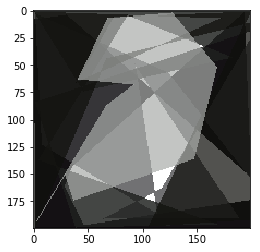

Iteration 31000
improvements 785
Fitness:  0.97589401435


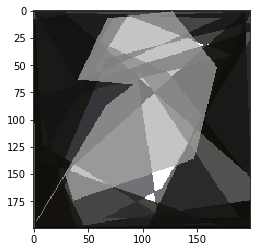

Iteration 32000
improvements 792
Fitness:  0.97597069559


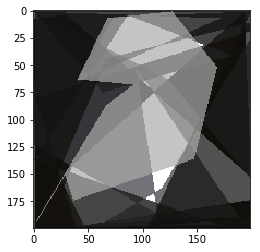

Iteration 33000
improvements 799
Fitness:  0.976097289085


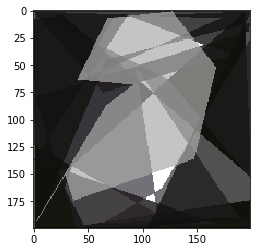

Iteration 34000
improvements 801
Fitness:  0.976103458855


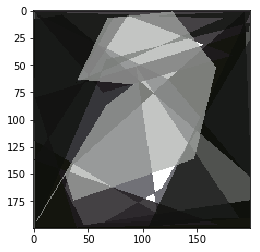

Iteration 35000
improvements 804
Fitness:  0.976175335862


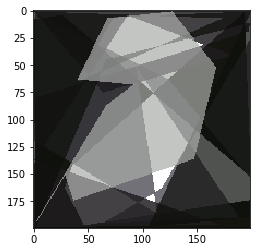

Iteration 36000
improvements 805
Fitness:  0.976183551359


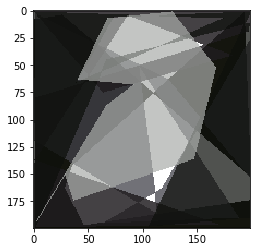

Iteration 37000
improvements 811
Fitness:  0.976257926954


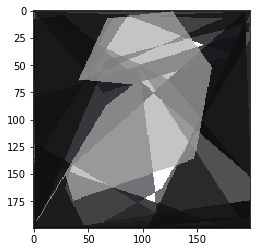

Iteration 38000
improvements 814
Fitness:  0.976297337643


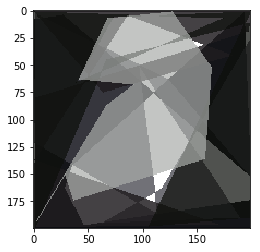

Iteration 39000
improvements 817
Fitness:  0.976421050659


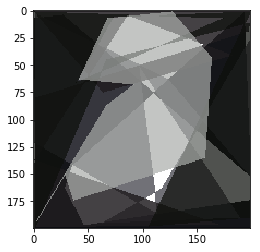

Iteration 40000
improvements 822
Fitness:  0.97661037882


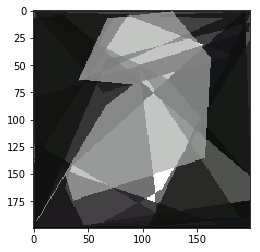

Iteration 41000
improvements 824
Fitness:  0.976615764198


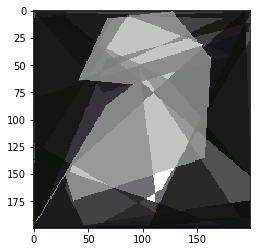

Iteration 42000
improvements 827
Fitness:  0.976629295136


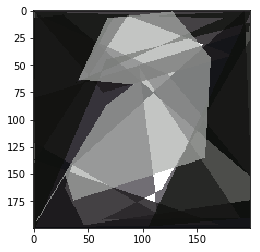

Iteration 43000
improvements 828
Fitness:  0.976630352068


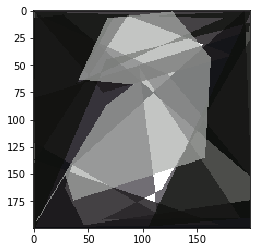

Iteration 44000
improvements 831
Fitness:  0.976666672591


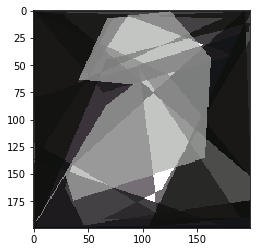

Iteration 45000
improvements 833
Fitness:  0.976710933239


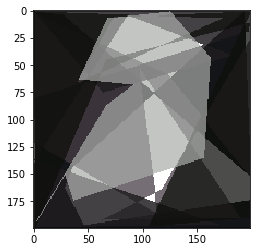

Iteration 46000
improvements 836
Fitness:  0.976774758066


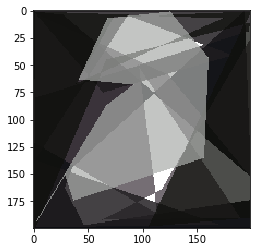

Iteration 47000
improvements 838
Fitness:  0.976805241252


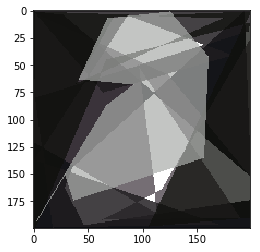

Iteration 48000
improvements 842
Fitness:  0.976810271143


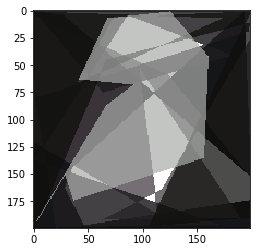

Iteration 49000
improvements 846
Fitness:  0.976865534516


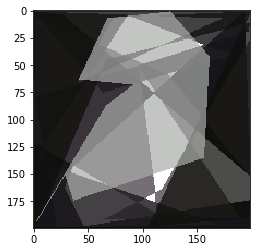

KeyboardInterrupt: 

In [302]:
hill(orig_mat, 5, 10, 100000, mut_random=True, mut_change=-1)

Iteration 0
improvements 0
Fit:  112.726326797


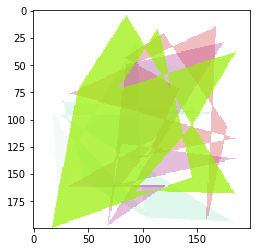

Iteration 1000
improvements 227
Fit:  27.698321411


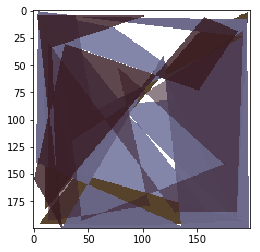

Iteration 2000
improvements 319
Fit:  19.2052166059


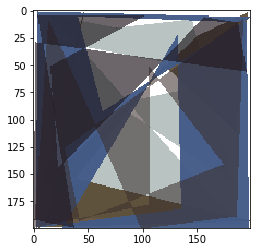

Iteration 3000
improvements 368
Fit:  16.0853573423


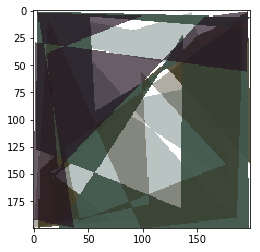

Iteration 4000
improvements 408
Fit:  14.462061451


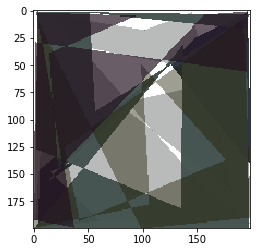

Iteration 5000
improvements 439
Fit:  13.2554144908


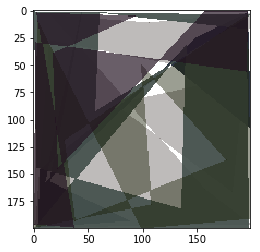

Iteration 6000
improvements 471
Fit:  12.9595971689


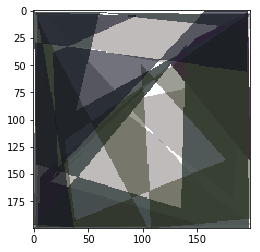

Iteration 7000
improvements 493
Fit:  12.4476773738


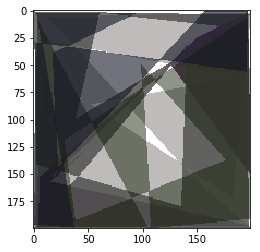

Iteration 8000
improvements 511
Fit:  11.8991426413


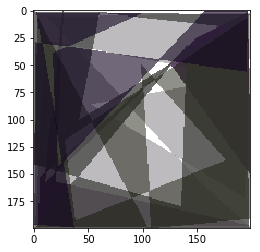

Iteration 9000
improvements 532
Fit:  11.2563845042


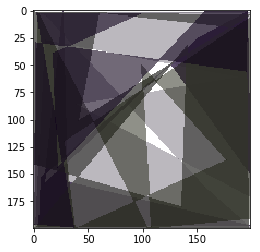

Iteration 10000
improvements 545
Fit:  11.0552443919


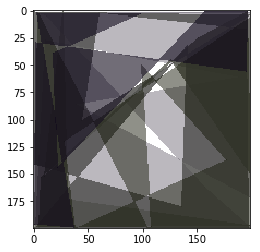

Iteration 11000
improvements 565
Fit:  10.8469733307


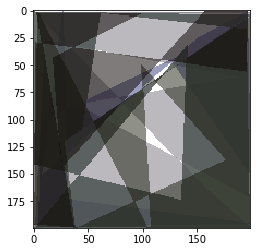

Iteration 12000
improvements 581
Fit:  10.7379283673


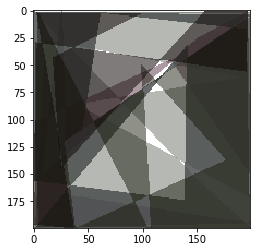

Iteration 13000
improvements 596
Fit:  10.6006900187


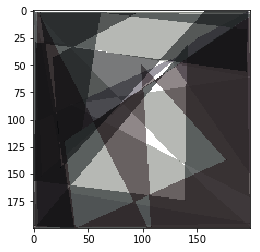

Iteration 14000
improvements 614
Fit:  10.3453532696


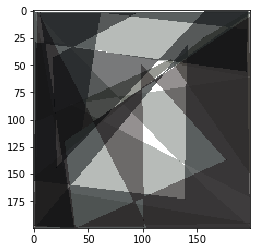

Iteration 15000
improvements 621
Fit:  10.290298683


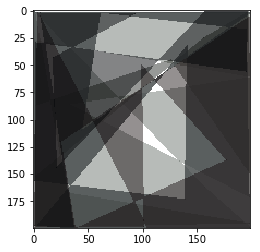

Iteration 16000
improvements 635
Fit:  10.2292810129


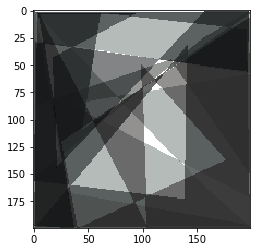

Iteration 17000
improvements 644
Fit:  9.46144671068


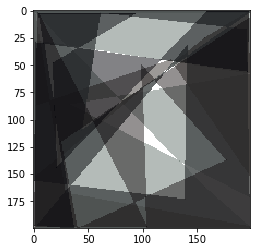

Iteration 18000
improvements 654
Fit:  9.43334850724


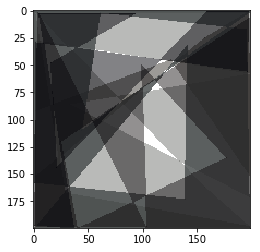

Iteration 19000
improvements 658
Fit:  9.42645383782


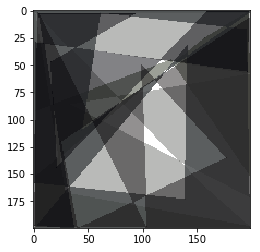

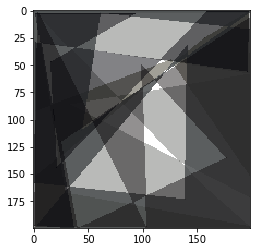

array([ 72,  75,  70,  98,  33,  86, 198, 171, 199,   2,   2,   2,   5,
         5, 157, 162, 199, 199,   2, 199,   1,  28, 199,  58,  38,  34,
        15, 111, 199, 198,  29, 167,   1,   1,   2, 152, 157,  25, 197,
         1, 199, 152, 126,  45,   2,  92,   2, 199,  72,  76,  77, 213,
       139, 173,   1, 158,   1,   1, 199,   1,  44, 110,  61,   2, 198,
        17, 198, 199,   1, 200, 141,  32,   6,   2,   3, 112, 199,   6,
       199, 199, 104, 200,   4,   2,   1, 199, 104, 198,  99,  50, 177,
       135,  40, 200,  25, 120,   1,   1,   6, 125,  93,   3,   2,   3,
        37, 200,   1, 197,   2,  29, 196,  56, 197,   1, 159,   1,  21,
       144,  16,  47])

In [297]:
hill(orig_mat, 5, 10, 20000, mut_random=True, mut_change=-1)  # absolute error instead of square error

Iteration 0
improvements 0
Fitness:  0.556366711425


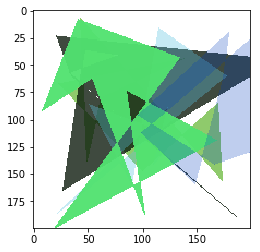

Iteration 1000
improvements 189
Fitness:  0.908972222383


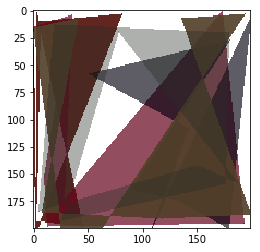

Iteration 2000
improvements 262
Fitness:  0.932493491165


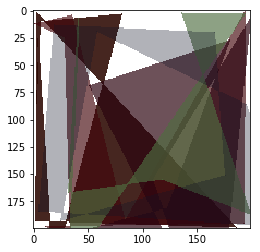

Iteration 3000
improvements 324
Fitness:  0.94621424333


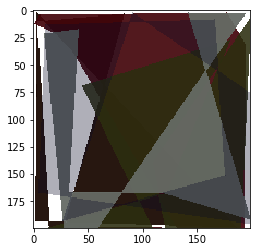

Iteration 4000
improvements 356
Fitness:  0.950360068058


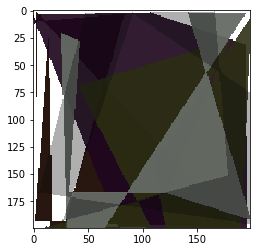

Iteration 5000
improvements 383
Fitness:  0.955523190861


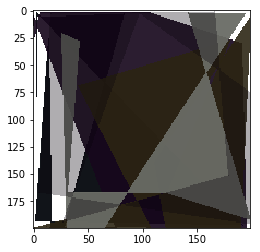

Iteration 6000
improvements 402
Fitness:  0.958608415524


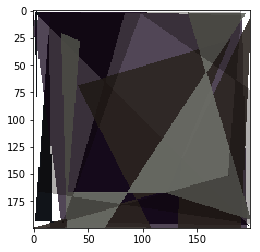

Iteration 7000
improvements 422
Fitness:  0.961175567573


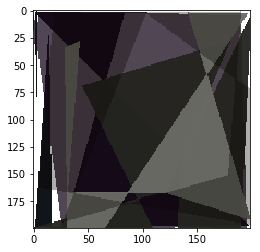

Iteration 8000
improvements 442
Fitness:  0.963490123951


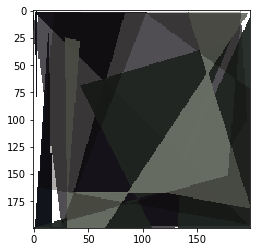

Iteration 9000
improvements 458
Fitness:  0.965880710357


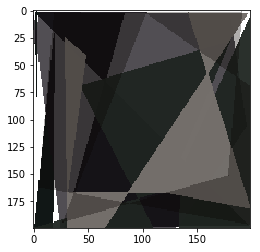

Iteration 10000
improvements 484
Fitness:  0.966771169831


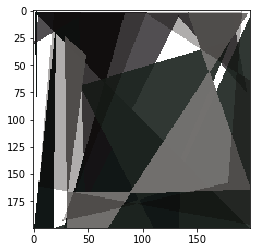

Iteration 11000
improvements 506
Fitness:  0.967248762845


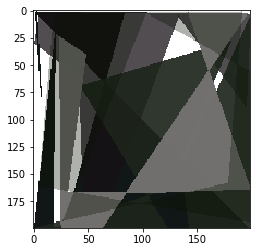

Iteration 12000
improvements 522
Fitness:  0.967492437067


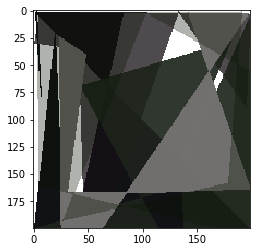

Iteration 13000
improvements 541
Fitness:  0.967871257093


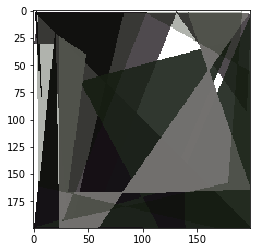

Iteration 14000
improvements 556
Fitness:  0.967991109334


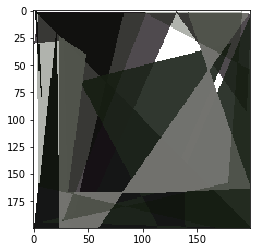

Iteration 15000
improvements 565
Fitness:  0.968035209239


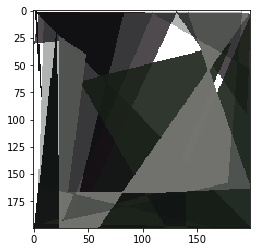

Iteration 16000
improvements 574
Fitness:  0.968610261354


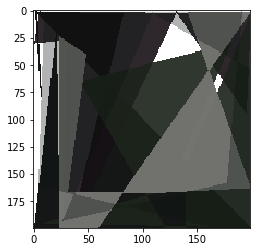

Iteration 17000
improvements 583
Fitness:  0.968770590232


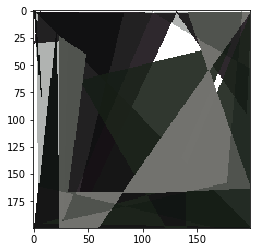

Iteration 18000
improvements 592
Fitness:  0.968805415003


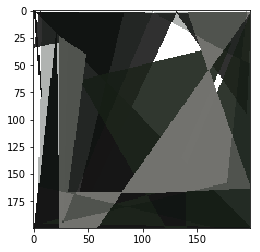

Iteration 19000
improvements 600
Fitness:  0.968981149242


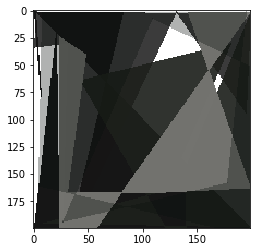

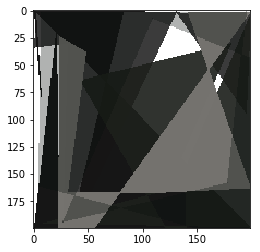

array([ 10,  11,  11, 243,   2,   1, 199, 199,   1, 199,  21,  21,  24,
       243,  82,   2,   1,   1,   7,  79,  22,  21,  21, 214, 102,   1,
         3,   1,   1,  34,  32,  30,  27, 221, 131,   1, 195,  94, 199,
         4,  29,  32,  27, 233,   9, 195, 198, 199, 199,   4, 139, 146,
       141, 234,  43,  64, 181,  30, 122, 165, 116, 114, 110, 254, 121,
       167,  31, 167,  48,  38,  24,  24,  23, 245, 199,   1, 142,   2,
       199, 163,   8,  15,  12,  82, 195,   1,   7,   2,   5, 161, 232,
       222, 247,  63, 109,   7,  27, 194, 178, 158])

In [330]:
hill(orig_mat, 10, 3, 20000, mut_random=True, mut_change=-1)  # absolute error instead of square error

Iteration 0
improvements 1
Fitness:  0.681705057905


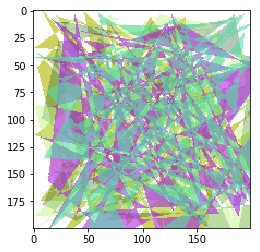

Iteration 1000
improvements 406
Fitness:  0.839010548707


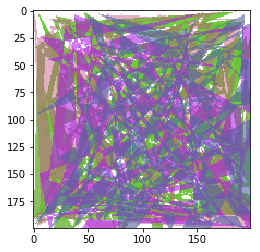

KeyboardInterrupt: 

In [349]:
hill(orig_mat, 50, 6, 100000, mut_random=True, mut_change=-1)

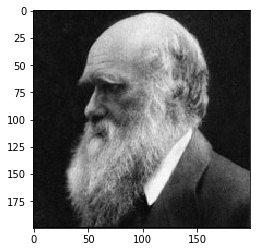

In [348]:
plt.imshow(orig_mat)
plt.show()

Iteration 0
improvements 0
Fit:  0.101980648732


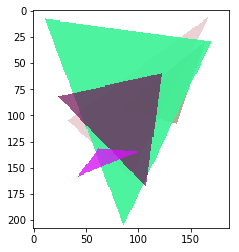

Iteration 1000
improvements 138
Fit:  0.0258512099129


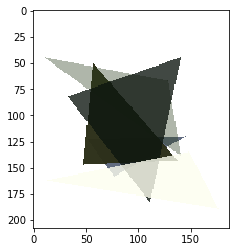

Iteration 2000
improvements 195
Fit:  0.0175149009497


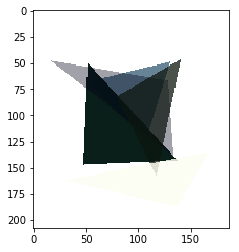

Iteration 3000
improvements 251
Fit:  0.00849506220461


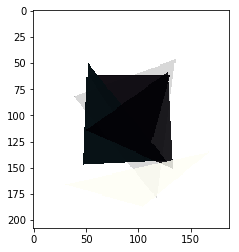

Iteration 4000
improvements 285
Fit:  0.00415402715881


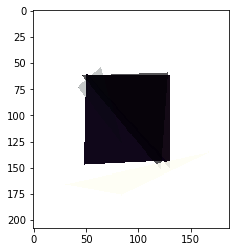

Iteration 5000
improvements 299
Fit:  0.00395299079402


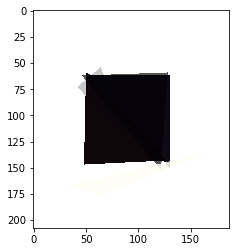

Iteration 6000
improvements 310
Fit:  0.00391328871127


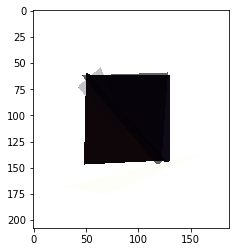

Iteration 7000
improvements 326
Fit:  0.0024489017477


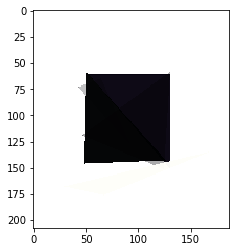

Iteration 8000
improvements 341
Fit:  0.00214520391144


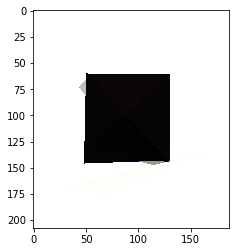

Iteration 9000
improvements 346
Fit:  0.00207171212667


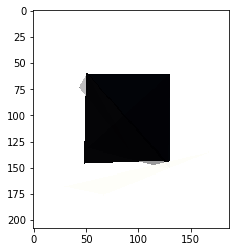

Iteration 10000
improvements 351
Fit:  0.0020427194384


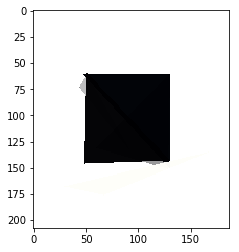

Iteration 11000
improvements 358
Fit:  0.0019953023057


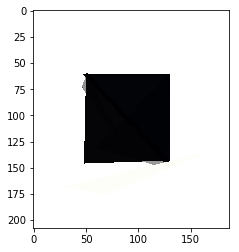

Iteration 12000
improvements 377
Fit:  0.000882067608609


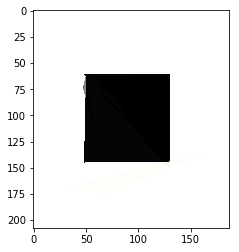

Iteration 13000
improvements 387
Fit:  0.00087247226317


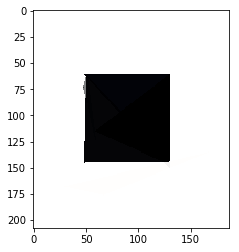

Iteration 14000
improvements 391
Fit:  0.000848860301333


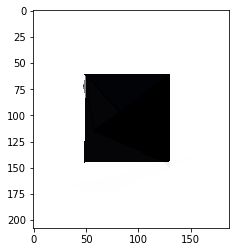

Iteration 15000
improvements 394
Fit:  0.000840381509016


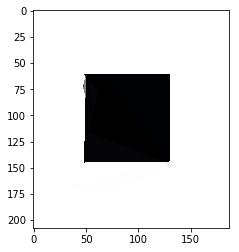

Iteration 16000
improvements 398
Fit:  0.000835912265283


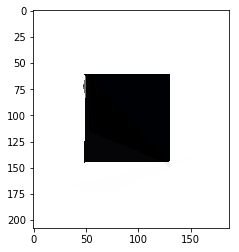

Iteration 17000
improvements 404
Fit:  0.000831098381984


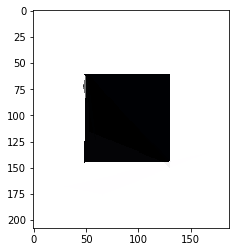

Iteration 18000
improvements 407
Fit:  0.000821634566292


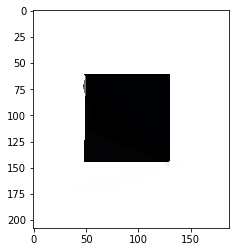

Iteration 19000
improvements 410
Fit:  0.000806517870939


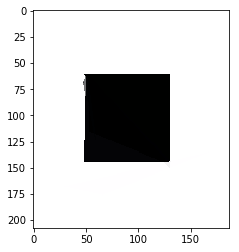

Iteration 20000
improvements 420
Fit:  0.000804077453782


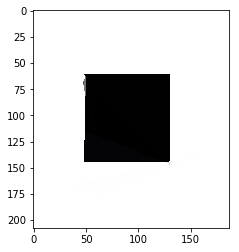

Iteration 21000
improvements 428
Fit:  0.000756435218068


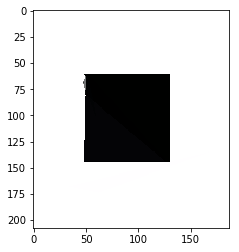

Iteration 22000
improvements 434
Fit:  0.00075070299882


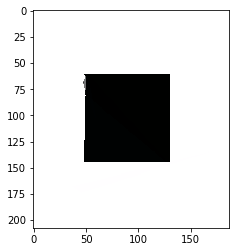

Iteration 23000
improvements 435
Fit:  0.00075060810762


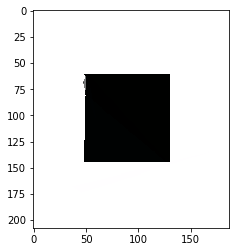

Iteration 24000
improvements 459
Fit:  0.000208829304596


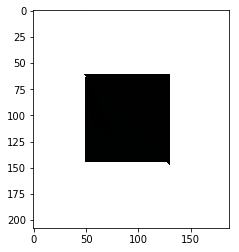

Iteration 25000
improvements 474
Fit:  0.000155783146827


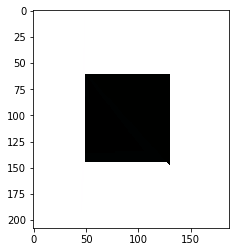

Iteration 26000
improvements 488
Fit:  0.000154864020119


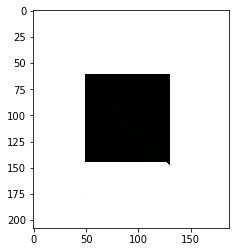

Iteration 27000
improvements 490
Fit:  0.000154571702506


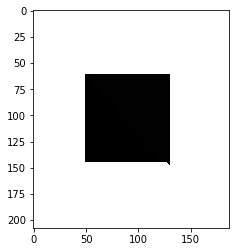

Iteration 28000
improvements 490
Fit:  0.000154571702506


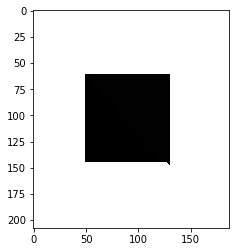

Iteration 29000
improvements 495
Fit:  0.000154520303106


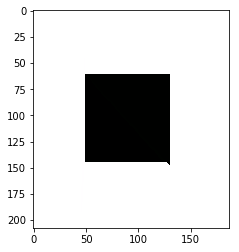

Iteration 30000
improvements 497
Fit:  0.000154395626612


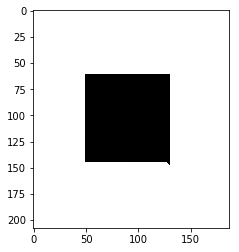

Iteration 31000
improvements 499
Fit:  0.000154314969092


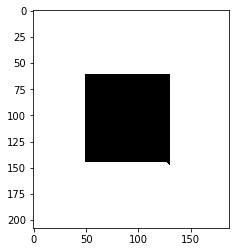

Iteration 32000
improvements 499
Fit:  0.000154314969092


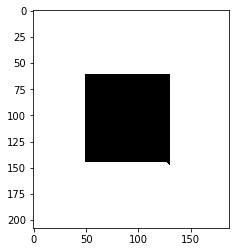

Iteration 33000
improvements 499
Fit:  0.000154314969092


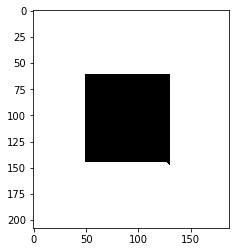

Iteration 34000
improvements 501
Fit:  0.000154298758512


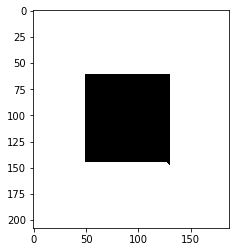

Iteration 35000
improvements 502
Fit:  1.86316235573e-06


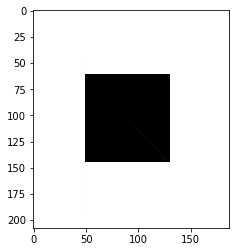

Iteration 36000
improvements 508
Fit:  7.74944800998e-07


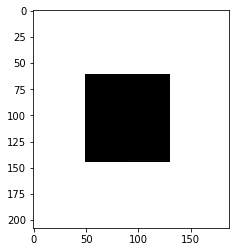

Iteration 37000
improvements 509
Fit:  2.53043200326e-07


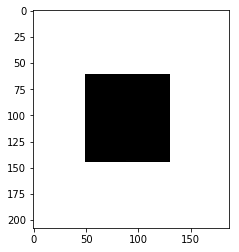

Iteration 38000
improvements 509
Fit:  2.53043200326e-07


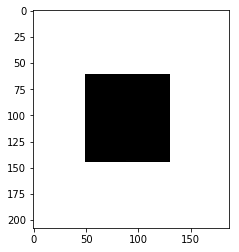

Iteration 39000
improvements 510
Fit:  0.0


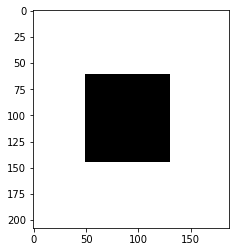

Iteration 40000
improvements 510
Fit:  0.0


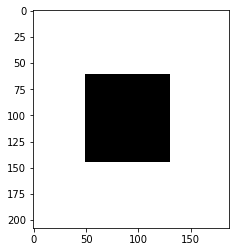

Iteration 41000
improvements 510
Fit:  0.0


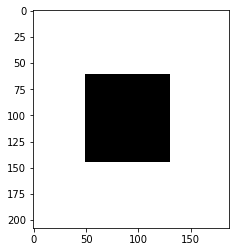

Iteration 42000
improvements 510
Fit:  0.0


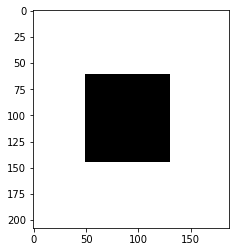

Iteration 43000
improvements 510
Fit:  0.0


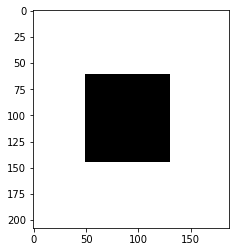

Iteration 44000
improvements 510
Fit:  0.0


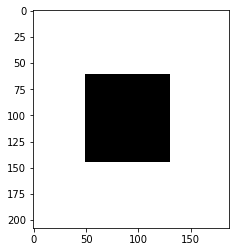

Iteration 45000
improvements 510
Fit:  0.0


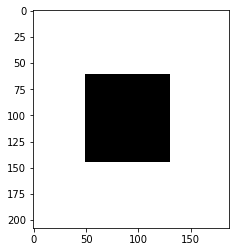

Iteration 46000
improvements 510
Fit:  0.0


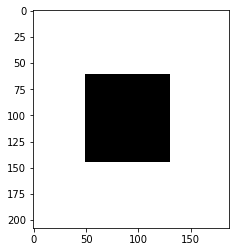

Iteration 47000
improvements 510
Fit:  0.0


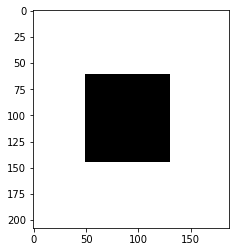

Iteration 48000
improvements 510
Fit:  0.0


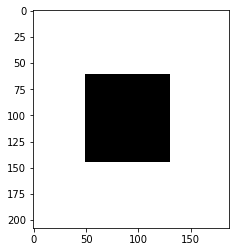

Iteration 49000
improvements 510
Fit:  0.0


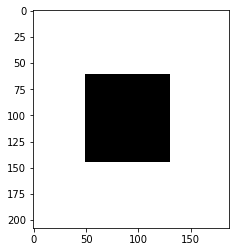

Iteration 50000
improvements 510
Fit:  0.0


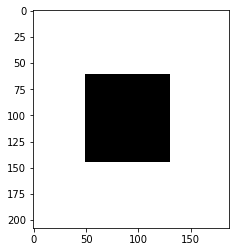

Iteration 51000
improvements 510
Fit:  0.0


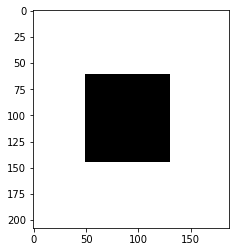

Iteration 52000
improvements 510
Fit:  0.0


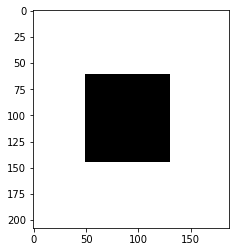

Iteration 53000
improvements 510
Fit:  0.0


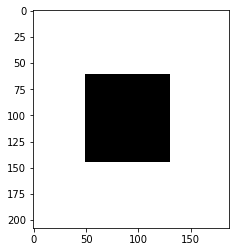

Iteration 54000
improvements 510
Fit:  0.0


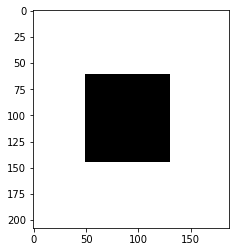

Iteration 55000
improvements 510
Fit:  0.0


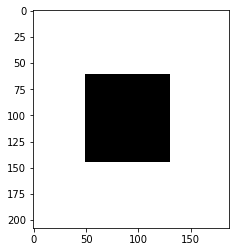

Iteration 56000
improvements 510
Fit:  0.0


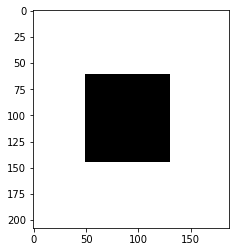

Iteration 57000
improvements 510
Fit:  0.0


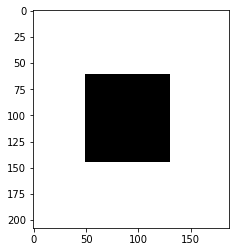

Iteration 58000
improvements 510
Fit:  0.0


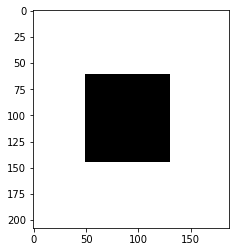

Iteration 59000
improvements 510
Fit:  0.0


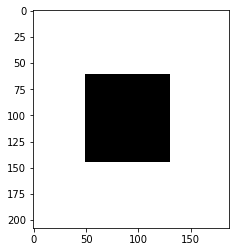

Iteration 60000
improvements 510
Fit:  0.0


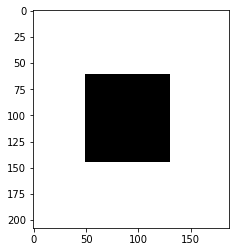

Iteration 61000
improvements 510
Fit:  0.0


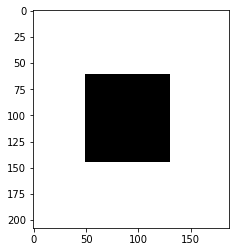

Iteration 62000
improvements 510
Fit:  0.0


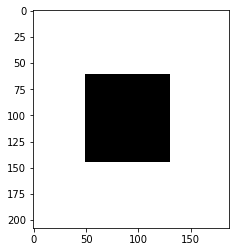

Iteration 63000
improvements 510
Fit:  0.0


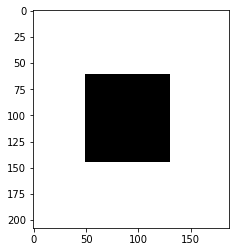

Iteration 64000
improvements 510
Fit:  0.0


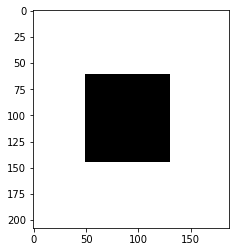

Iteration 65000
improvements 510
Fit:  0.0


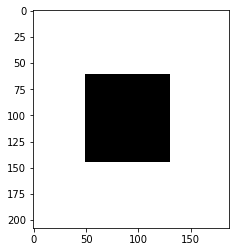

Iteration 66000
improvements 510
Fit:  0.0


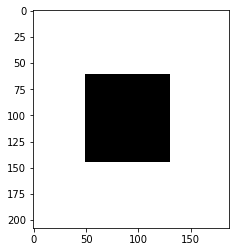

Iteration 67000
improvements 510
Fit:  0.0


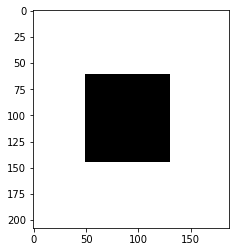

Iteration 68000
improvements 510
Fit:  0.0


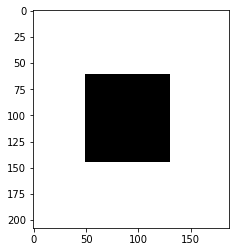

Iteration 69000
improvements 510
Fit:  0.0


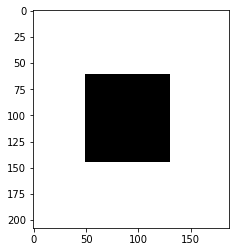

Iteration 70000
improvements 510
Fit:  0.0


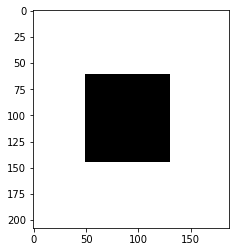

Iteration 71000
improvements 510
Fit:  0.0


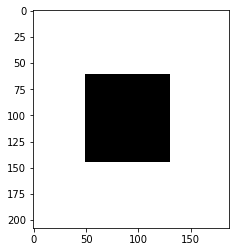

Iteration 72000
improvements 510
Fit:  0.0


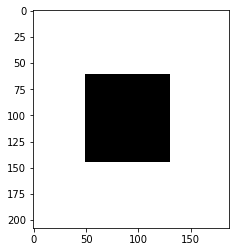

Iteration 73000
improvements 510
Fit:  0.0


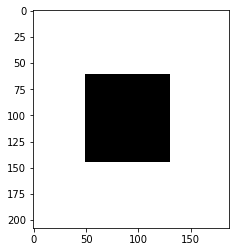

Iteration 74000
improvements 510
Fit:  0.0


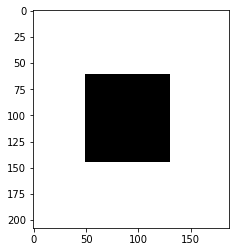

Iteration 75000
improvements 510
Fit:  0.0


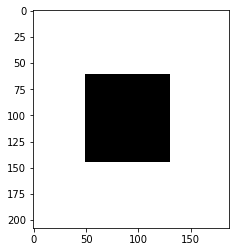

Iteration 76000
improvements 510
Fit:  0.0


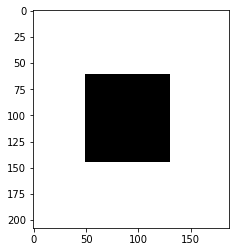

Iteration 77000
improvements 510
Fit:  0.0


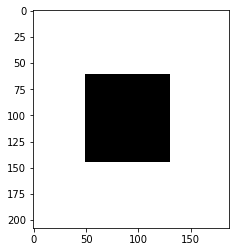

Iteration 78000
improvements 510
Fit:  0.0


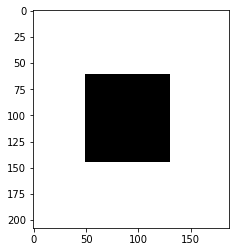

Iteration 79000
improvements 510
Fit:  0.0


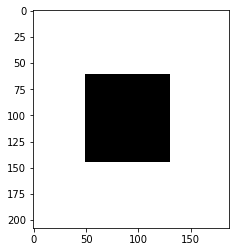

Iteration 80000
improvements 510
Fit:  0.0


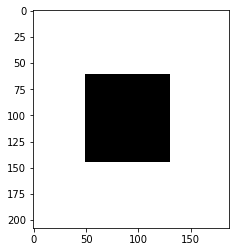

Iteration 81000
improvements 510
Fit:  0.0


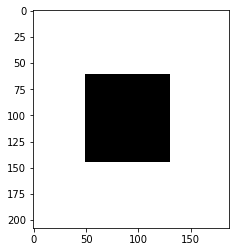

Iteration 82000
improvements 510
Fit:  0.0


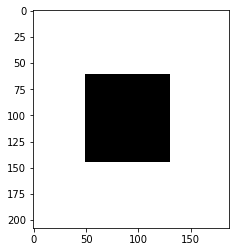

Iteration 83000
improvements 510
Fit:  0.0


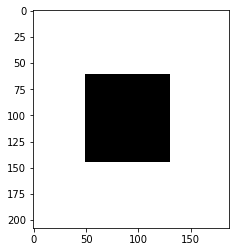

Iteration 84000
improvements 510
Fit:  0.0


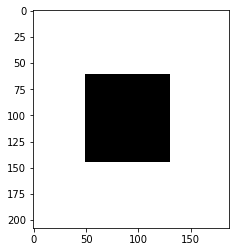

Iteration 85000
improvements 510
Fit:  0.0


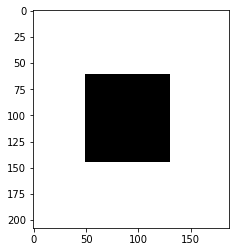

Iteration 86000
improvements 510
Fit:  0.0


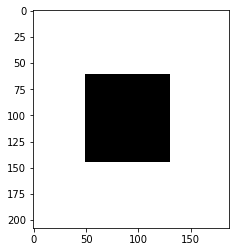

Iteration 87000
improvements 510
Fit:  0.0


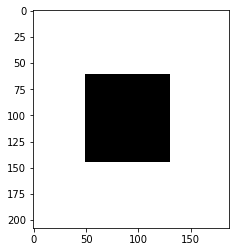

Iteration 88000
improvements 510
Fit:  0.0


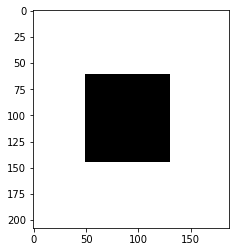

Iteration 89000
improvements 510
Fit:  0.0


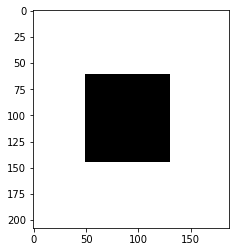

Iteration 90000
improvements 510
Fit:  0.0


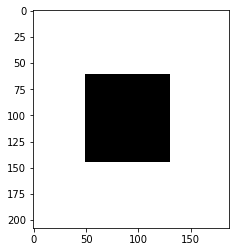

Iteration 91000
improvements 510
Fit:  0.0


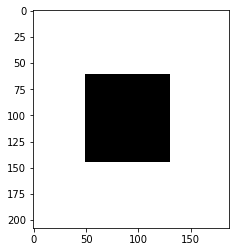

Iteration 92000
improvements 510
Fit:  0.0


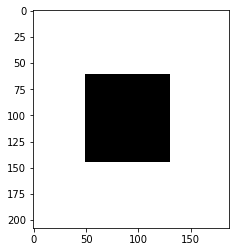

Iteration 93000
improvements 510
Fit:  0.0


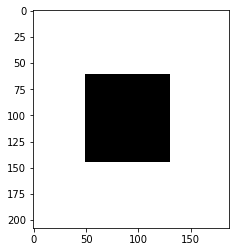

Iteration 94000
improvements 510
Fit:  0.0


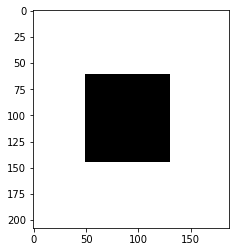

KeyboardInterrupt: 

In [290]:
hill(orig_square, 5, 3, 100000, mut_rate=0.01, mut_random=True, mut_change=-1)

In [360]:
hill(orig_square, 6, 10, 5000, mut_rate=0.01, mut_random=True, mut_change=-1)

Iteration 0
improvements 0
Fitness:  0.873666834255


ValueError: array split does not result in an equal division

In [324]:
size = tuple(reversed(orig_mat.shape[:2]))
size

(199, 200)

In [325]:
new_img = gen_image_poly(size, np.split(dna, nr_poly))


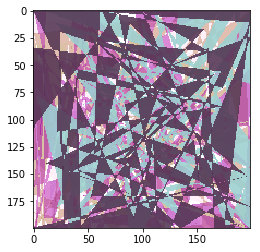

In [326]:
plt.imshow(new_img)
plt.show()

For some reason this is not working..

In [327]:
square_error(new_img, orig_mat)

1335246906

In [328]:
1335246906/(255*255*3*199*200)

0.1719795834226882

### Voronoi stuff

In [158]:
def get_bounds_voronoi(nr_points, size, rgb_range = [0,255]):
    
    w_range = [1, size[0]]
    h_range = [1, size[1]]

    point = 3*[rgb_range] + [w_range, h_range]  # R; G, B, x, y
    bounds = nr_points*point

    return bounds

bounds_v = get_bounds_voronoi(nr_points=5, size = size)

In [155]:
def popul_from_bounds_voronoi(bounds, popsize, nr_params = 5):
    
    population = []
    
    nr_points = len(bounds_v)//nr_params  # 5 - RGB and then X,Y
    
    for i in range(0, popsize):
        indv = []

        for j in range(nr_points):
            point = []
            for k in range(nr_params):
                point.append(randint(bounds[k][0],bounds[k][1]))
            indv.append(point)
        population.append(indv)
        
    return population

popul_from_bounds_voronoi(bounds=bounds_v, popsize=1)

[[[213, 178, 191, 157, 118],
  [74, 22, 111, 30, 112],
  [51, 18, 226, 137, 155],
  [201, 34, 121, 54, 114],
  [175, 73, 27, 67, 86]]]

In [ ]:
def hill_voronoi(orig_img, nr_points, iter = 10, mut_rate = 0.05, mut_change = 0.05, mut_random = False):
    
    # Get params
    size = tuple(reversed(orig_img.shape[:2])) # W and H of image
    bounds_v = get_bounds_voronoi(nr_points=nr_points, size = size)
    
    # Init DNA
    dna = popul_from_bounds_voronoi(bounds=bounds_v, popsize=1)[0]  # Only one element in pop, take 1st
    dna = np.array(dna).flatten()
    #print(dna)
    
    cost_last = cost_voronoi(nr_points=nr_points, orig_mat=orig_img, params=dna)
        
    len_dna = len(dna)
    dna_last = dna
    dna_new = dna_last.copy()
    
    impr = 0
    
    for i in range(iter):    
        
        # Select randomly param to change and change it by mutation rate
        idx = randint(0, len_dna - 1)
        direction = choice([-1,1])  # Select randomly the direction
        limits = bounds[idx]  # limits 
        
        if mut_random:
            dna_new[idx] = randint(limits[0], limits[1])
        else:
            #Mutate
            dna_new[idx] = dna_last[idx] + direction*limits[1]*mut_rate
        
        # Quick limits check
        if dna_new[idx] > limits[1]:
            dna_new[idx] = limits[1]
        elif dna_new[idx] < limits[0]:
            dna_new[idx] = limits[0]
        
        # Calculate new cost
        cost_new = cost_poly(nr_poly=nr_poly, orig_mat=orig_img, params=dna_new)
        
        mut = random()
        
        # Compare costs
        if (mut < mut_change)  or (cost_new < cost_last):
            dna_last = dna_new.copy()
            cost_last = cost_new
            impr += 1
        else:
            dna_new = dna_last.copy()
            
        if i % 1000 == 0:
            print("Iteration", i)
            print("improvements", impr)
            fit = cost_last/(255*255*3*size[0]*size[1])
            print("Fit: ", fit)
            show_img(size, dna_last)
        
    
    show_img(size, dna_last)
    return dna_last